Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [3]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Load dataset

In [16]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [17]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [6]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [7]:
print(model_lists["univariate"])

['MetricMotif', 'GLS', 'MLEnsemble', 'DatepartRegression', 'GLM', 'PreprocessingRegression', 'Theta', 'UnobservedComponents', 'FFT', 'NeuralProphet', 'UnivariateMotif', 'UnivariateRegression', 'SeasonalNaive', 'ARIMA', 'ETS', 'ConstantNaive', 'KalmanStateSpace', 'LastValueNaive', 'ARDL', 'AverageValueNaive', 'FBProphet', 'SeasonalityMotif', 'ARCH']


Train test split, fit and prediction

In [18]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]
model.fit(train[target_column])
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04210D+00    |proj g|=  6.13241D-02


 This problem is unconstrained.



At iterate    1    f=  9.03609D+00    |proj g|=  5.31338D-02

At iterate    2    f=  9.03219D+00    |proj g|=  2.61606D-02

At iterate    3    f=  9.03032D+00    |proj g|=  2.00666D-02

At iterate    4    f=  9.02794D+00    |proj g|=  2.15335D-02

At iterate    5    f=  9.02458D+00    |proj g|=  2.32838D-02

At iterate    6    f=  9.02077D+00    |proj g|=  3.53904D-02

At iterate    7    f=  9.01609D+00    |proj g|=  5.21585D-02

At iterate    8    f=  9.00853D+00    |proj g|=  5.49024D-02

At iterate    9    f=  9.00228D+00    |proj g|=  1.34950D-01

At iterate   10    f=  8.99815D+00    |proj g|=  5.76993D-02

At iterate   11    f=  8.99585D+00    |proj g|=  3.89188D-02

At iterate   12    f=  8.99397D+00    |proj g|=  3.04762D-02

At iterate   13    f=  8.99122D+00    |proj g|=  2.51368D-02

At iterate   14    f=  8.98884D+00    |proj g|=  3.55730D-02

At iterate   15    f=  8.98664D+00    |proj g|=  4.17288D-02

At iterate   16    f=  8.98501D+00    |proj g|=  2.17170D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5


2024-01-25 16:24:12.926371: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-25 16:24:13.051088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 16:24:13.051128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 16:24:13.067642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 16:24:13.102969: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
36/36 [==============================] - 3s 2ms/step - loss: 0.3909
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3846
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3829
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3807
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3839
Epoch 8/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3793
Epoch 9/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 10/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3787
Epoch 11/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 12/50
36/36 [==============================] - 0s 2ms/step - loss: 0.3791
Epoch 13/50
36/36 [==============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


16:24:23 - cmdstanpy - INFO - Chain [1] start processing
16:24:24 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5
Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegr

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 47 with model GLM in generation 0 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 47 in generation 0: GLM
Model Number: 48 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 48 in generation 0: PreprocessingRegression
Model Number: 49 with model Theta in generation 0 of 5
Model Number: 50 with model UnobservedComponents in generation 0 of 5
Model Number: 51 with model FFT in generation 0 of 5
Model Number: 52 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 52 in generation 0: NeuralProphet
Model Number: 53 with model UnivariateMotif in generation 0 of 5
Model Number: 54 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_r

 This problem is unconstrained.


Model Number: 58 with model ConstantNaive in generation 0 of 5
Model Number: 59 with model KalmanStateSpace in generation 0 of 5
Model Number: 60 with model LastValueNaive in generation 0 of 5
Model Number: 61 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 61 in generation 0: ARDL
Model Number: 62 with model AverageValueNaive in generation 0 of 5
Model Number: 63 with model FBProphet in generation 0 of 5
Model Number: 64 with model SeasonalityMotif in generation 0 of 5
Model Number: 65 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 65 in generation 0: ARCH
Model Number: 66 with model KalmanStateSpace in generation 0 of 5
Model Number: 67 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 67 in generation 0: MetricMotif
Model Number: 68 with model Univa

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 70 in generation 0: UnivariateRegression
Model Number: 71 with model AverageValueNaive in generation 0 of 5
Model Number: 72 with model UnobservedComponents in generation 0 of 5
Model Number: 73 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  r

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 73 in generation 0: GLM
Model Number: 74 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 74 in generation 0: NeuralProphet
Model Number: 75 with model GLS in generation 0 of 5
Model Number: 76 with model GLM in generation 0 of 5
Model Number: 77 with model MLEnsemble in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 77 in generation 0: MLEnsemble
Model Number: 78 with model SeasonalNaive in generation 0 of 5
Model Number: 79 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 79 in generation 0: NeuralProphet
Model Number: 80 with model FBProphet in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 80 in generation 0: FBProphet
Model Number: 81 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 81 in generation 0: MLEnsemble
Model Number: 82 with model GLS

 This problem is unconstrained.



At iterate    1    f= -3.98151D-01    |proj g|=  1.65928D+00

At iterate    2    f= -4.55490D-01    |proj g|=  1.64765D+00

At iterate    3    f= -5.32040D-01    |proj g|=  4.93600D-01

At iterate    4    f= -6.09032D-01    |proj g|=  7.38765D-01

At iterate    5    f= -6.71448D-01    |proj g|=  1.90696D+00

At iterate    6    f= -6.91877D-01    |proj g|=  9.66644D-01

At iterate    7    f= -6.96652D-01    |proj g|=  5.75804D-01

At iterate    8    f= -7.01309D-01    |proj g|=  2.71244D-01

At iterate    9    f= -7.02694D-01    |proj g|=  1.59523D-01

At iterate   10    f= -7.04592D-01    |proj g|=  1.32691D-01

At iterate   11    f= -7.06569D-01    |proj g|=  1.20396D-01

At iterate   12    f= -7.12150D-01    |proj g|=  2.33944D-01

At iterate   13    f= -7.18869D-01    |proj g|=  2.63654D-01

At iterate   14    f= -7.20366D-01    |proj g|=  4.61258D-01

At iterate   15    f= -7.23983D-01    |proj g|=  1.79782D-01

At iterate   16    f= -7.24961D-01    |proj g|=  5.82515D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 103 with model FFT in generation 0 of 5
Model Number: 104 with model FFT in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 105 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 105 in generation 0: PreprocessingRegression
Model Number: 106 with model SeasonalNaive in generation 0 of 5
Model Number: 107 with model KalmanStateSpace in generation 0 of 5
Model Number: 108 with model SeasonalityMotif in generation 0 of 5
Model Number: 109 with model GLS in generation 0 of 5
Model Number: 110 with model FFT in generation 0 of 5
Model Number: 111 with model ETS in generation 0 of 5
Model Number: 112 with model SeasonalityMotif in generation 0 of 5
Model Number: 113 with model MetricMotif in generation 0 of 5
Model Number: 114 with model ConstantNaive in generation 0 of 5
Model Number: 115 with model UnivariateMotif in generation 0 of 5
Model Number: 116 with model LastValueNaive in generation 0 of 5
Model Number: 117 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dim

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 124 in generation 0: MLEnsemble
Model Number: 125 with model AverageValueNaive in generation 0 of 5
Model Number: 126 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 126 in generation 0: MLEnsemble
Model Number: 127 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61368D+00    |proj g|=  9.88906D-01

At iterate    1    f=  9.37015D+00    |proj g|=  4.23741D-01

At iterate    2    f=  9.26435D+00    |proj g|=  7.29097D-02

At iterate    3    f=  9.25857D+00    |proj g|=  4.03631D-02

At iterate    4    f=  9.25238D+0

 This problem is unconstrained.



At iterate    5    f=  9.24264D+00    |proj g|=  4.28864D-02

At iterate    6    f=  9.22668D+00    |proj g|=  6.42465D-02

At iterate    7    f=  9.21571D+00    |proj g|=  8.00531D-02

At iterate    8    f=  9.20413D+00    |proj g|=  5.30117D-02

At iterate    9    f=  9.20042D+00    |proj g|=  1.08465D-01

At iterate   10    f=  9.19594D+00    |proj g|=  7.21270D-02

At iterate   11    f=  9.19356D+00    |proj g|=  1.86877D-01

At iterate   12    f=  9.19021D+00    |proj g|=  2.40874D-02

At iterate   13    f=  9.18855D+00    |proj g|=  4.28965D-02

At iterate   14    f=  9.18554D+00    |proj g|=  2.09264D-02

At iterate   15    f=  9.18371D+00    |proj g|=  2.83296D-02

At iterate   16    f=  9.18273D+00    |proj g|=  2.25147D-02

At iterate   17    f=  9.18220D+00    |proj g|=  1.20644D-02

At iterate   18    f=  9.18132D+00    |proj g|=  1.05233D-02

At iterate   19    f=  9.18003D+00    |proj g|=  3.14556D-02

At iterate   20    f=  9.17930D+00    |proj g|=  8.92978D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 148 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 148 in generation 0: GLM
Model Number: 149 with model KalmanStateSpace in generation 0 of 5
Model Number: 150 with model AverageValueNaive in generation 0 of 5
Model Number: 151 with model MetricMotif in generation 0 of 5
Model Number: 152 with model ETS in generation 0 of 5
Model Number: 153 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 153 in generation 0: MLEnsemble
Model Number: 154 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 154 in generation 0: PreprocessingRegression
Model Number: 155 with model PreprocessingRegressi

 This problem is unconstrained.



At iterate    8    f= -1.15466D+00    |proj g|=  7.45648D-01

At iterate    9    f= -1.16387D+00    |proj g|=  1.86806D-01

At iterate   10    f= -1.16817D+00    |proj g|=  5.42442D-01

At iterate   11    f= -1.17221D+00    |proj g|=  8.18863D-01

At iterate   12    f= -1.17710D+00    |proj g|=  8.29709D-01

At iterate   13    f= -1.19113D+00    |proj g|=  6.68044D-01

At iterate   14    f= -1.21079D+00    |proj g|=  4.00837D-01

At iterate   15    f= -1.21591D+00    |proj g|=  1.60416D-01

At iterate   16    f= -1.21819D+00    |proj g|=  3.72658D-01

At iterate   17    f= -1.21894D+00    |proj g|=  3.23628D-01

At iterate   18    f= -1.22054D+00    |proj g|=  1.04697D-01

At iterate   19    f= -1.22135D+00    |proj g|=  6.50787D-02

At iterate   20    f= -1.22351D+00    |proj g|=  2.68357D-01

At iterate   21    f= -1.22442D+00    |proj g|=  1.30824D-01

At iterate   22    f= -1.22483D+00    |proj g|=  3.96187D-02

At iterate   23    f= -1.22523D+00    |proj g|=  6.27267D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 169 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61325D+00    |proj g|=  9.88877D-01

At iterate    1    f=  9.36944D+00    |proj g|=  4.23534D-01

At iterate    2    f=  9.26361D+00    |proj g|=  7.27227D-02

At iterate    3    f=  9.25783D+00    |proj g|=  4.04161D-02


 This problem is unconstrained.



At iterate    4    f=  9.25159D+00    |proj g|=  3.90420D-02

At iterate    5    f=  9.24175D+00    |proj g|=  4.30240D-02

At iterate    6    f=  9.22572D+00    |proj g|=  6.54675D-02

At iterate    7    f=  9.21468D+00    |proj g|=  7.84456D-02

At iterate    8    f=  9.20353D+00    |proj g|=  5.11803D-02

At iterate    9    f=  9.19891D+00    |proj g|=  9.64261D-02

At iterate   10    f=  9.19473D+00    |proj g|=  9.23203D-02

At iterate   11    f=  9.19198D+00    |proj g|=  3.11621D-02

At iterate   12    f=  9.18899D+00    |proj g|=  9.14053D-02

At iterate   13    f=  9.18623D+00    |proj g|=  3.73465D-02

At iterate   14    f=  9.18469D+00    |proj g|=  1.62187D-02

At iterate   15    f=  9.18340D+00    |proj g|=  2.77251D-02

At iterate   16    f=  9.18260D+00    |proj g|=  8.73217D-03

At iterate   17    f=  9.18152D+00    |proj g|=  2.13064D-02

At iterate   18    f=  9.18043D+00    |proj g|=  1.06607D-02

At iterate   19    f=  9.17941D+00    |proj g|=  9.40537D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  9.35692D+00    |proj g|=  9.60732D-02

At iterate    3    f=  9.35108D+00    |proj g|=  4.65866D-02

At iterate    4    f=  9.34329D+00    |proj g|=  5.11710D-02

At iterate    5    f=  9.33267D+00    |proj g|=  4.94028D-02

At iterate    6    f=  9.30838D+00    |proj g|=  5.62260D-02

At iterate    7    f=  9.30326D+00    |proj g|=  1.80243D-01

At iterate    8    f=  9.29894D+00    |proj g|=  6.55074D-02

At iterate    9    f=  9.28773D+00    |proj g|=  1.43558D-01

At iterate   10    f=  9.28408D+00    |proj g|=  4.47292D-02

At iterate   11    f=  9.27953D+00    |proj g|=  5.44082D-02

At iterate   12    f=  9.27657D+00    |proj g|=  6.33070D-02

At iterate   13    f=  9.26818D+00    |proj g|=  2.39559D-02

At iterate   14    f=  9.26572D+00    |proj g|=  2.02214D-02

At iterate   15    f=  9.26217D+00    |proj g|=  3.55871D-02

At iterate   16    f=  9.26088D+00    |proj g|=  8.96591D-03

At iterate   17    f=  9.26062D+00    |proj g|=  7.88373D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 185 with model ConstantNaive in generation 1 of 5
Model Number: 186 with model DatepartRegression in generation 1 of 5
Model Number: 187 with model UnobservedComponents in generation 1 of 5
Model Number: 188 with model ETS in generation 1 of 5
Model Number: 189 with model LastValueNaive in generation 1 of 5
Model Number: 190 with model FFT in generation 1 of 5
Model Number: 191 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.19534D-01    |proj g|=  6.59633D-03

At iterate    1    f= -5.19535D-01    |proj g|=  2.11874D-04

At iterate    2    f= -5.19535D-01    |proj g|=  2.11874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = num

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 193 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04629D+00    |proj g|=  4.87846D-02

At iterate    1    f=  9.03564D+00    |proj g|=  4.41171D-02

At iterate    2    f=  9.03235D+00    |proj g|=  4.05226D-02

At iterate    3    f=  9.02992D+00    |proj g|=  2.56803D-02

At iterate    4    f=  9.02707D+00    |proj g|=  1.14562D-02

At iterate    5    f=  9.02578D+00    |proj g|=  1.10288D-02


 This problem is unconstrained.



At iterate    6    f=  9.02461D+00    |proj g|=  1.93470D-02

At iterate    7    f=  9.02165D+00    |proj g|=  3.70903D-02

At iterate    8    f=  9.02089D+00    |proj g|=  6.41998D-02

At iterate    9    f=  9.02044D+00    |proj g|=  8.80260D-02

At iterate   10    f=  9.01702D+00    |proj g|=  2.17801D-02

At iterate   11    f=  9.01589D+00    |proj g|=  4.28931D-02

At iterate   12    f=  9.01474D+00    |proj g|=  2.59358D-02

At iterate   13    f=  9.01289D+00    |proj g|=  5.41101D-02

At iterate   14    f=  9.01069D+00    |proj g|=  5.18548D-02

At iterate   15    f=  9.01010D+00    |proj g|=  8.11271D-02

At iterate   16    f=  9.00968D+00    |proj g|=  2.68175D-02

At iterate   17    f=  9.00943D+00    |proj g|=  1.34234D-02

At iterate   18    f=  9.00932D+00    |proj g|=  6.46146D-03

At iterate   19    f=  9.00926D+00    |proj g|=  3.65238D-03

At iterate   20    f=  9.00924D+00    |proj g|=  1.42525D-03

At iterate   21    f=  9.00921D+00    |proj g|=  3.90793D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 211 with model FFT in generation 1 of 5
Model Number: 212 with model FBProphet in generation 1 of 5
Model Number: 213 with model Theta in generation 1 of 5
Model Number: 214 with model Theta in generation 1 of 5
Model Number: 215 with model UnivariateMotif in generation 1 of 5
Model Number: 216 with model UnivariateMotif in generation 1 of 5
Model Number: 217 with model AverageValueNaive in generation 1 of 5
Model Number: 218 with model LastValueNaive in generation 1 of 5
Model Number: 219 with model UnivariateMotif in generation 1 of 5
Template Eval Error: ValueError('kth(=100) out of bounds (77)') in model 219 in generation 1: UnivariateMotif
Model Number: 220 with model SeasonalNaive in generation 1 of 5
Model Number: 221 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 221 in generation 1: UnivariateRegression
Model Number: 222 with model AverageValueNaive in generation 1 of 5
Model Nu

 This problem is unconstrained.



At iterate    2    f=  9.35692D+00    |proj g|=  9.60732D-02

At iterate    3    f=  9.35108D+00    |proj g|=  4.65866D-02

At iterate    4    f=  9.34329D+00    |proj g|=  5.11710D-02

At iterate    5    f=  9.33267D+00    |proj g|=  4.94028D-02

At iterate    6    f=  9.30838D+00    |proj g|=  5.62260D-02

At iterate    7    f=  9.30326D+00    |proj g|=  1.80243D-01

At iterate    8    f=  9.29894D+00    |proj g|=  6.55074D-02

At iterate    9    f=  9.28773D+00    |proj g|=  1.43558D-01

At iterate   10    f=  9.28408D+00    |proj g|=  4.47292D-02

At iterate   11    f=  9.27953D+00    |proj g|=  5.44082D-02

At iterate   12    f=  9.27657D+00    |proj g|=  6.33070D-02

At iterate   13    f=  9.26818D+00    |proj g|=  2.39559D-02

At iterate   14    f=  9.26572D+00    |proj g|=  2.02214D-02

At iterate   15    f=  9.26217D+00    |proj g|=  3.55871D-02

At iterate   16    f=  9.26088D+00    |proj g|=  8.96591D-03

At iterate   17    f=  9.26062D+00    |proj g|=  7.88373D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 273 in generation 2: UnivariateRegression
Model Number: 274 with model UnivariateMotif in generation 2 of 5
Model Number: 275 with model AverageValueNaive in generation 2 of 5
Model Number: 276 with model UnivariateMotif in generation 2 of 5
Model Number: 277 with model SeasonalNaive in generation 2 of 5
Model Number: 278 with model AverageValueNaive in generation 2 of 5
Model Number: 279 with model DatepartRegression in generation 2 of 5
Model Number: 280 with model AverageValueNaive in generation 2 of 5
Model Number: 281 with model UnobservedComponents in generation 2 of 5
Model Number: 282 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05866D+00    |proj g|=  7.85899D-01


 This problem is unconstrained.



At iterate    1    f= -1.08359D+00    |proj g|=  1.81011D+00

At iterate    2    f= -1.08729D+00    |proj g|=  1.54919D-01

At iterate    3    f= -1.08833D+00    |proj g|=  3.24881D-02

At iterate    4    f= -1.08841D+00    |proj g|=  1.51236D-02

At iterate    5    f= -1.08844D+00    |proj g|=  1.40859D-02

At iterate    6    f= -1.08848D+00    |proj g|=  1.18318D-02

At iterate    7    f= -1.08856D+00    |proj g|=  1.04690D-02

At iterate    8    f= -1.08859D+00    |proj g|=  1.48947D-02

At iterate    9    f= -1.08861D+00    |proj g|=  1.80109D-03

At iterate   10    f= -1.08861D+00    |proj g|=  1.43816D-03

At iterate   11    f= -1.08861D+00    |proj g|=  1.53877D-03

At iterate   12    f= -1.08861D+00    |proj g|=  2.72947D-03

At iterate   13    f= -1.08861D+00    |proj g|=  3.47221D-03

At iterate   14    f= -1.08861D+00    |proj g|=  7.60123D-03

At iterate   15    f= -1.08862D+00    |proj g|=  3.15891D-03

At iterate   16    f= -1.08862D+00    |proj g|=  1.43271D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -2.11001D+00    |proj g|=  9.07435D-01

At iterate    2    f= -2.11572D+00    |proj g|=  1.13279D+00

At iterate    3    f= -2.12554D+00    |proj g|=  3.21326D+00

At iterate    4    f= -2.12815D+00    |proj g|=  9.54475D-01

At iterate    5    f= -2.12847D+00    |proj g|=  1.28419D-01

At iterate    6    f= -2.12851D+00    |proj g|=  1.95658D-01

At iterate    7    f= -2.12864D+00    |proj g|=  4.55042D-01

At iterate    8    f= -2.12889D+00    |proj g|=  6.76924D-01

At iterate    9    f= -2.12938D+00    |proj g|=  7.67150D-01

At iterate   10    f= -2.13082D+00    |proj g|=  1.03762D+00

At iterate   11    f= -2.13503D+00    |proj g|=  1.41124D+00

At iterate   12    f= -2.14193D+00    |proj g|=  1.77567D+00

At iterate   13    f= -2.15153D+00    |proj g|=  1.38633D+00

At iterate   14    f= -2.15317D+00    |proj g|=  2.86557D+00

At iterate   15    f= -2.15869D+00    |proj g|=  8.35546D-01

At iterate   16    f= -2.16069D+00    |proj g|=  4.31354D-01

At iter

 This problem is unconstrained.



At iterate   16    f= -6.88652D-01    |proj g|=  8.81814D-03

At iterate   17    f= -6.88657D-01    |proj g|=  1.46067D-02

At iterate   18    f= -6.88660D-01    |proj g|=  7.60152D-03

At iterate   19    f= -6.88660D-01    |proj g|=  4.98326D-04

At iterate   20    f= -6.88660D-01    |proj g|=  3.08059D-04

At iterate   21    f= -6.88660D-01    |proj g|=  3.09461D-04

At iterate   22    f= -6.88660D-01    |proj g|=  1.32257D-03

At iterate   23    f= -6.88660D-01    |proj g|=  2.13525D-04

At iterate   24    f= -6.88660D-01    |proj g|=  1.06846D-04

At iterate   25    f= -6.88660D-01    |proj g|=  5.95723D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    1    f= -4.13508D-01    |proj g|=  1.17558D+00

At iterate    2    f= -5.07225D-01    |proj g|=  7.01901D-01

At iterate    3    f= -5.81080D-01    |proj g|=  2.90309D+00

At iterate    4    f= -6.83522D-01    |proj g|=  2.05306D+00

At iterate    5    f= -7.51390D-01    |proj g|=  2.53179D-01

At iterate    6    f= -7.86930D-01    |proj g|=  7.48852D-01

At iterate    7    f= -8.08404D-01    |proj g|=  3.95750D-01

At iterate    8    f= -8.17175D-01    |proj g|=  3.00503D-01

At iterate    9    f= -8.33622D-01    |proj g|=  4.37239D-01

At iterate   10    f= -8.65450D-01    |proj g|=  2.06823D-01

At iterate   11    f= -8.86952D-01    |proj g|=  2.20965D-01

At iterate   12    f= -9.02268D-01    |proj g|=  1.79770D-01

At iterate   13    f= -9.32330D-01    |proj g|=  1.71785D-01

At iterate   14    f= -9.48644D-01    |proj g|=  4.01634D-01

At iterate   15    f= -9.51369D-01    |proj g|=  5.75143D-01

At iterate   16    f= -9.53079D-01    |proj g|=  1.85544D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 317 with model Theta in generation 2 of 5
Model Number: 318 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06928D+00    |proj g|=  9.82872D-01

At iterate    1    f=  8.75155D+00    |proj g|=  9.59911D-02

At iterate    2    f=  8.72970D+00    |proj g|=  5.04775D-02

At iterate    3    f=  8.72567D+00    |proj g|=  4.45627D-02

At iterate    4    f=  8.71658D+00    |proj g|=  2.56971D-02


 This problem is unconstrained.



At iterate    5    f=  8.71176D+00    |proj g|=  1.81117D-02

At iterate    6    f=  8.71042D+00    |proj g|=  5.50174D-02

At iterate    7    f=  8.70355D+00    |proj g|=  2.27032D-02

At iterate    8    f=  8.69948D+00    |proj g|=  1.57763D-02

At iterate    9    f=  8.69859D+00    |proj g|=  1.30187D-02

At iterate   10    f=  8.69611D+00    |proj g|=  2.12731D-02

At iterate   11    f=  8.69374D+00    |proj g|=  2.64630D-02

At iterate   12    f=  8.69146D+00    |proj g|=  5.06404D-02

At iterate   13    f=  8.69087D+00    |proj g|=  2.26173D-02

At iterate   14    f=  8.69071D+00    |proj g|=  4.62465D-02

At iterate   15    f=  8.69018D+00    |proj g|=  2.71184D-02

At iterate   16    f=  8.68923D+00    |proj g|=  2.45888D-02

At iterate   17    f=  8.68882D+00    |proj g|=  1.56107D-02

At iterate   18    f=  8.68647D+00    |proj g|=  8.67266D-02

At iterate   19    f=  8.68483D+00    |proj g|=  3.29119D-02

At iterate   20    f=  8.68376D+00    |proj g|=  5.70406D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.55805D+00    |proj g|=  6.42138D-03

At iterate    2    f=  8.55794D+00    |proj g|=  4.50220D-03

At iterate    3    f=  8.55791D+00    |proj g|=  2.07200D-03

At iterate    4    f=  8.55791D+00    |proj g|=  1.40908D-03

At iterate    5    f=  8.55790D+00    |proj g|=  1.28128D-03

At iterate    6    f=  8.55789D+00    |proj g|=  1.50965D-03

At iterate    7    f=  8.55786D+00    |proj g|=  3.33187D-03

At iterate    8    f=  8.55776D+00    |proj g|=  7.05043D-03

At iterate    9    f=  8.55746D+00    |proj g|=  1.64862D-02

At iterate   10    f=  8.55727D+00    |proj g|=  2.14916D-02

At iterate   11    f=  8.55654D+00    |proj g|=  1.00232D-02

At iterate   12    f=  8.55636D+00    |proj g|=  5.41485D-03

At iterate   13    f=  8.55634D+00    |proj g|=  6.98280D-03

At iterate   14    f=  8.55624D+00    |proj g|=  1.65246D-03

At iterate   15    f=  8.55624D+00    |proj g|=  6.70917D-04

At iterate   16    f=  8.55624D+00    |proj g|=  4.30810D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  2.71207D-01    |proj g|=  1.34791D-01

At iterate    6    f=  2.56507D-01    |proj g|=  1.17122D-01

At iterate    7    f=  2.10884D-01    |proj g|=  3.73204D-01

At iterate    8    f=  1.88127D-01    |proj g|=  2.19307D-01

At iterate    9    f=  1.55762D-01    |proj g|=  2.48603D-01

At iterate   10    f=  1.31607D-01    |proj g|=  4.88328D-01

At iterate   11    f=  1.13746D-01    |proj g|=  2.23769D-01

At iterate   12    f=  1.09279D-01    |proj g|=  4.23218D-01

At iterate   13    f=  1.02067D-01    |proj g|=  1.70947D-01

At iterate   14    f=  9.43417D-02    |proj g|=  1.92703D-01

At iterate   15    f=  8.81395D-02    |proj g|=  4.04790D-01

At iterate   16    f=  8.26789D-02    |proj g|=  1.67127D-01

At iterate   17    f=  8.09557D-02    |proj g|=  7.88825D-02

At iterate   18    f=  7.89522D-02    |proj g|=  5.34213D-02

At iterate   19    f=  7.65275D-02    |proj g|=  5.86594D-02

At iterate   20    f=  7.30127D-02    |proj g|=  1.17925D-01

At iter

 This problem is unconstrained.



At iterate    9    f=  9.05326D+00    |proj g|=  5.47353D-02

At iterate   10    f=  9.05136D+00    |proj g|=  3.33100D-02

At iterate   11    f=  9.04960D+00    |proj g|=  2.26158D-02

At iterate   12    f=  9.04835D+00    |proj g|=  4.85078D-02

At iterate   13    f=  9.04694D+00    |proj g|=  3.04444D-02

At iterate   14    f=  9.04511D+00    |proj g|=  7.80508D-02

At iterate   15    f=  9.04349D+00    |proj g|=  3.38184D-02

At iterate   16    f=  9.04326D+00    |proj g|=  2.02275D-02

At iterate   17    f=  9.04306D+00    |proj g|=  1.58673D-02

At iterate   18    f=  9.04282D+00    |proj g|=  1.37972D-02

At iterate   19    f=  9.04259D+00    |proj g|=  1.25758D-02

At iterate   20    f=  9.04253D+00    |proj g|=  3.51560D-03

At iterate   21    f=  9.04246D+00    |proj g|=  8.72002D-03

At iterate   22    f=  9.04239D+00    |proj g|=  1.50736D-02

At iterate   23    f=  9.04226D+00    |proj g|=  1.91792D-02

At iterate   24    f=  9.04210D+00    |proj g|=  1.43449D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 357 with model FFT in generation 2 of 5
Model Number: 358 with model UnobservedComponents in generation 2 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 358 in generation 2: UnobservedComponents
Model Number: 359 with model ETS in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 359 in generation 2: ETS
Model Number: 360 with model SeasonalNaive in generation 2 of 5
Model Number: 361 with model GLS in generation 2 of 5
Model Number: 362 with model UnobservedComponents in generation 2 of 5
Model Number: 363 with model DatepartRegression in generation 2 of 5
Model Number: 364 with model UnobservedComponents in generation 2 of 5
Model Number: 365 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14813D

 This problem is unconstrained.



At iterate    8    f=  8.74009D+00    |proj g|=  1.09494D-01

At iterate    9    f=  8.73581D+00    |proj g|=  1.66662D-01

At iterate   10    f=  8.73297D+00    |proj g|=  2.51268D-02

At iterate   11    f=  8.73131D+00    |proj g|=  4.39430D-02

At iterate   12    f=  8.72854D+00    |proj g|=  3.29095D-02

At iterate   13    f=  8.72511D+00    |proj g|=  2.80347D-02

At iterate   14    f=  8.72135D+00    |proj g|=  1.99276D-01

At iterate   15    f=  8.71892D+00    |proj g|=  1.34268D-02

At iterate   16    f=  8.71825D+00    |proj g|=  1.98135D-02

At iterate   17    f=  8.71680D+00    |proj g|=  2.56235D-02

At iterate   18    f=  8.71483D+00    |proj g|=  3.90590D-02

At iterate   19    f=  8.71417D+00    |proj g|=  2.91151D-02

At iterate   20    f=  8.71394D+00    |proj g|=  3.34807D-02

At iterate   21    f=  8.71384D+00    |proj g|=  8.41870D-03

At iterate   22    f=  8.71377D+00    |proj g|=  7.38223D-03

At iterate   23    f=  8.71363D+00    |proj g|=  1.49979D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  8.53294D+00    |proj g|=  3.79508D-03

At iterate    9    f=  8.53289D+00    |proj g|=  5.62171D-03

At iterate   10    f=  8.53286D+00    |proj g|=  7.88151D-03

At iterate   11    f=  8.53282D+00    |proj g|=  3.37143D-03

At iterate   12    f=  8.53282D+00    |proj g|=  9.47758D-04

At iterate   13    f=  8.53282D+00    |proj g|=  4.49282D-04

At iterate   14    f=  8.53282D+00    |proj g|=  4.93536D-04

At iterate   15    f=  8.53282D+00    |proj g|=  5.47138D-04

At iterate   16    f=  8.53281D+00    |proj g|=  1.24957D-03

At iterate   17    f=  8.53281D+00    |proj g|=  2.42486D-03

At iterate   18    f=  8.53280D+00    |proj g|=  2.79824D-03

At iterate   19    f=  8.53279D+00    |proj g|=  2.48458D-03

At iterate   20    f=  8.53278D+00    |proj g|=  1.75766D-03

At iterate   21    f=  8.53278D+00    |proj g|=  5.26991D-04

At iterate   22    f=  8.53278D+00    |proj g|=  2.29401D-04

At iterate   23    f=  8.53278D+00    |proj g|=  3.93912D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 370 with model GLM in generation 2 of 5
Model Number: 371 with model Theta in generation 2 of 5
Model Number: 372 with model UnivariateMotif in generation 2 of 5
Model Number: 373 with model UnivariateRegression in generation 2 of 5
Model Number: 374 with model SeasonalNaive in generation 2 of 5
Model Number: 375 with model MetricMotif in generation 2 of 5
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 375 in generation 2: MetricMotif
Model Number: 376 with model ETS in generation 2 of 5
Model Number: 377 with model ConstantNaive in generation 2 of 5
Model Number: 378 with model FBProphet in generation 2 of 5
Model Number: 379 with model GLS in generation 2 of 5
Model Number: 380 with model UnivariateMotif in generation 2 of 5
Model Number: 381 with model UnobservedComponents in generation 2 of 5
Model Number: 382 with model SeasonalNaive in generation 2 of 5
Model Number: 383 with model MetricMotif in generation 2 of 5
Mo

 This problem is unconstrained.



At iterate    6    f=  9.69870D+00    |proj g|=  5.23916D-02

At iterate    7    f=  9.68925D+00    |proj g|=  2.70116D-02

At iterate    8    f=  9.68737D+00    |proj g|=  1.59521D-02

At iterate    9    f=  9.68578D+00    |proj g|=  3.18947D-02

At iterate   10    f=  9.68445D+00    |proj g|=  2.29402D-02

At iterate   11    f=  9.68346D+00    |proj g|=  2.67783D-02

At iterate   12    f=  9.68205D+00    |proj g|=  3.01147D-02

At iterate   13    f=  9.68167D+00    |proj g|=  2.53509D-02

At iterate   14    f=  9.67951D+00    |proj g|=  2.82105D-02

At iterate   15    f=  9.67826D+00    |proj g|=  2.51786D-02

At iterate   16    f=  9.67746D+00    |proj g|=  3.43332D-02

At iterate   17    f=  9.67702D+00    |proj g|=  1.22597D-02

At iterate   18    f=  9.67684D+00    |proj g|=  6.36775D-03

At iterate   19    f=  9.67675D+00    |proj g|=  6.31744D-03

At iterate   20    f=  9.67664D+00    |proj g|=  5.48310D-03

At iterate   21    f=  9.67634D+00    |proj g|=  1.99418D-02

At iter

 This problem is unconstrained.


Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 413 in generation 3: UnivariateMotif
Model Number: 414 with model UnivariateMotif in generation 3 of 5
Model Number: 415 with model ETS in generation 3 of 5
Model Number: 416 with model SeasonalNaive in generation 3 of 5
Model Number: 417 with model GLS in generation 3 of 5
Model Number: 418 with model UnobservedComponents in generation 3 of 5
Model Number: 419 with model ConstantNaive in generation 3 of 5
Model Number: 420 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 420 in generation 3: DatepartRegression
Model Number: 421 with model Theta in generation 3 of 5
Model Number: 422 with model AverageValueNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 423 with model GLS in generation 3 of 5
Model Number: 424 with model SeasonalityMotif in generation 3 of 5
Model Number: 425 with model SeasonalNaive in generation 3 of 5
Model Number: 426 with model UnivariateMotif in generation 3 of 5
Model Number: 427 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 428 with model GLM in generation 3 of 5
Model Number: 429 with model ARIMA in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93455D-01    |proj g|=  6.42624D-01

At iterate    1    f=  2.74942D-01    |proj g|=  1.28593D+00

At iterate    2    f=  1.23308D-01    |proj g|=  6.40749D-01

At iterate    3    f=  9.29590D-02    |proj g|=  3.14083D-01

At iterate    4    f=  7.24925D-02    |proj g|=  3.76085D-01

At iterate    5    f=  6.13284D-03    |proj g|=  1.44287D-01

At iterate    6    f= -3.65802D-02    |proj g|=  3.80194D-01

At iterate    7    f= -5.84173D-02    |proj g|=  2.43937D-01

At iterate    8    f= -6.99453D-02    |proj g|=  2.53725D-01

At iterate    9    f= -8.82386D-02    |proj g|=  5.21499D-01

At iterate   10    f= -9.89603D-02    |proj g|=  7.93523D-02

At iterate   11    f= -1.04245D-01    |proj g|=  7.59648D-02

At iterate   12    f= -1.13941D-01    |proj g|=  6.05086D-02

At iterate   13    f= -1.2

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 459 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 460 with model FFT in generation 3 of 5
Model Number: 461 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 461 in generation 3: UnobservedComponents
Model Number: 462 with model ConstantNaive in generation 3 of 5
Model Number: 463 with model UnobservedComponents in generation 3 of 5
Model Number: 464 with model SeasonalityMotif in generation 3 of 5
Model Number: 465 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 465 in generation 3: ARDL
Model Number: 466 with model UnivariateRegression in generation 3 of 5
Model Number: 467 with model SeasonalNaive in generation 3 of 5
Model Number: 468 with model GLS in generation 3 of 5
Model Number: 469 with model ETS in generation 3 of 5
Model Number: 470 with model UnivariateRegression in generation 3 of 5
Model Number: 471 with model Consta

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.55673D-01    |proj g|=  1.10251D+00

At iterate    1    f= -7.61276D-01    |proj g|=  2.19134D-01

At iterate    2    f= -7.62200D-01    |proj g|=  2.17619D-01

At iterate    3    f= -7.67511D-01    |proj g|=  7.28922D-01

At iterate    4    f= -7.73035D-01    |proj g|=  8.67839D-01


 This problem is unconstrained.



At iterate    5    f= -7.78344D-01    |proj g|=  2.99068D-01

At iterate    6    f= -7.79739D-01    |proj g|=  1.12588D-01

At iterate    7    f= -7.80378D-01    |proj g|=  2.67719D-01

At iterate    8    f= -7.81757D-01    |proj g|=  5.23936D-01

At iterate    9    f= -7.84767D-01    |proj g|=  8.43493D-01

At iterate   10    f= -7.90500D-01    |proj g|=  1.14010D+00

At iterate   11    f= -7.97773D-01    |proj g|=  1.13317D+00

At iterate   12    f= -8.17745D-01    |proj g|=  1.43084D+00

At iterate   13    f= -8.35462D-01    |proj g|=  7.42336D-01

At iterate   14    f= -8.45548D-01    |proj g|=  4.96626D-01

At iterate   15    f= -8.55868D-01    |proj g|=  9.75867D-01

At iterate   16    f= -8.60769D-01    |proj g|=  7.80324D-01

At iterate   17    f= -9.03466D-01    |proj g|=  1.01141D+00

At iterate   18    f= -9.48701D-01    |proj g|=  2.72849D-01

At iterate   19    f= -9.55686D-01    |proj g|=  1.19168D+00

At iterate   20    f= -9.64361D-01    |proj g|=  1.36670D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 483 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02379D+01    |proj g|=  3.05522D+01

At iterate    1    f=  1.58997D+01    |proj g|=  1.19408D+00


 This problem is unconstrained.



At iterate    2    f=  1.56359D+01    |proj g|=  7.90273D-01

At iterate    3    f=  1.54344D+01    |proj g|=  2.61504D-01

At iterate    4    f=  1.54192D+01    |proj g|=  1.72104D-01

At iterate    5    f=  1.54136D+01    |proj g|=  1.09885D-01

At iterate    6    f=  1.54058D+01    |proj g|=  1.09946D-01

At iterate    7    f=  1.53873D+01    |proj g|=  1.14994D-01

At iterate    8    f=  1.53537D+01    |proj g|=  2.88596D-01

At iterate    9    f=  1.53002D+01    |proj g|=  5.31637D-01

At iterate   10    f=  1.52748D+01    |proj g|=  5.86203D-01

At iterate   11    f=  1.51330D+01    |proj g|=  2.09698D-01

At iterate   12    f=  1.51040D+01    |proj g|=  1.62663D-01

At iterate   13    f=  1.50726D+01    |proj g|=  9.52056D-02

At iterate   14    f=  1.50565D+01    |proj g|=  8.96857D-02

At iterate   15    f=  1.50476D+01    |proj g|=  5.67175D-02

At iterate   16    f=  1.50413D+01    |proj g|=  2.65814D-02

At iterate   17    f=  1.50402D+01    |proj g|=  2.01903D-02

At iter

 This problem is unconstrained.



At iterate   13    f=  6.65551D+00    |proj g|=  1.23362D+00

At iterate   14    f=  6.64005D+00    |proj g|=  2.13843D+00

At iterate   15    f=  6.60047D+00    |proj g|=  1.68506D+00

At iterate   16    f=  6.58901D+00    |proj g|=  3.50099D-01

At iterate   17    f=  6.58047D+00    |proj g|=  2.48776D-01

At iterate   18    f=  6.57221D+00    |proj g|=  1.49852D-01

At iterate   19    f=  6.56966D+00    |proj g|=  4.19270D-01

At iterate   20    f=  6.56470D+00    |proj g|=  5.20186D-01

At iterate   21    f=  6.55517D+00    |proj g|=  2.11776D-01

At iterate   22    f=  6.54201D+00    |proj g|=  4.26425D-01

At iterate   23    f=  6.52536D+00    |proj g|=  7.09551D-01

At iterate   24    f=  6.50160D+00    |proj g|=  1.30069D+00

At iterate   25    f=  6.48290D+00    |proj g|=  2.14530D+00

At iterate   26    f=  6.46425D+00    |proj g|=  1.35849D+00

At iterate   27    f=  6.42823D+00    |proj g|=  3.51008D-01

At iterate   28    f=  6.41581D+00    |proj g|=  8.85229D-01

At iter

 This problem is unconstrained.



At iterate   11    f= -2.22346D+00    |proj g|=  4.00444D-01

At iterate   12    f= -2.22387D+00    |proj g|=  1.10946D-01

At iterate   13    f= -2.22403D+00    |proj g|=  1.16590D-01

At iterate   14    f= -2.22404D+00    |proj g|=  1.21522D+00

At iterate   15    f= -2.22422D+00    |proj g|=  5.38262D-01

At iterate   16    f= -2.22436D+00    |proj g|=  1.58292D-01

At iterate   17    f= -2.22455D+00    |proj g|=  2.13810D-01

At iterate   18    f= -2.22462D+00    |proj g|=  1.50937D-01

At iterate   19    f= -2.22469D+00    |proj g|=  5.67484D-02

At iterate   20    f= -2.22483D+00    |proj g|=  1.72233D-01

At iterate   21    f= -2.22502D+00    |proj g|=  3.46763D-01

At iterate   22    f= -2.22547D+00    |proj g|=  4.65582D-01

At iterate   23    f= -2.22634D+00    |proj g|=  5.49881D-01

At iterate   24    f= -2.22753D+00    |proj g|=  6.00513D-01

At iterate   25    f= -2.22776D+00    |proj g|=  5.33166D-01

At iterate   26    f= -2.22836D+00    |proj g|=  5.22675D-01

At iter

 This problem is unconstrained.


Model Number: 519 with model UnobservedComponents in generation 4 of 5
Model Number: 520 with model ETS in generation 4 of 5
Model Number: 521 with model UnivariateMotif in generation 4 of 5
Model Number: 522 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.11245D-01    |proj g|=  1.17375D+00


 This problem is unconstrained.



At iterate    1    f= -5.14372D-01    |proj g|=  2.59426D+00

At iterate    2    f= -7.76310D-01    |proj g|=  7.64136D-01

At iterate    3    f= -8.14805D-01    |proj g|=  3.73180D+00

At iterate    4    f= -8.80040D-01    |proj g|=  7.46755D-01

At iterate    5    f= -9.04173D-01    |proj g|=  7.29790D-01

At iterate    6    f= -9.95381D-01    |proj g|=  4.46552D-01

At iterate    7    f= -1.09914D+00    |proj g|=  2.66009D+00

At iterate    8    f= -1.13521D+00    |proj g|=  1.01276D+00

At iterate    9    f= -1.14157D+00    |proj g|=  2.05356D-01

At iterate   10    f= -1.15396D+00    |proj g|=  5.53056D-01

At iterate   11    f= -1.17029D+00    |proj g|=  1.23490D+00

At iterate   12    f= -1.17392D+00    |proj g|=  2.81980D-01

At iterate   13    f= -1.17519D+00    |proj g|=  1.00469D-01

At iterate   14    f= -1.17543D+00    |proj g|=  1.42552D-01

At iterate   15    f= -1.17611D+00    |proj g|=  1.67945D-01

At iterate   16    f= -1.17916D+00    |proj g|=  1.01278D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 538 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66153D+00    |proj g|=  1.00742D+00

At iterate    1    f=  9.35796D+00    |proj g|=  1.96485D-01

At iterate    2    f=  9.31159D+00    |proj g|=  1.14457D-01


 This problem is unconstrained.



At iterate    3    f=  9.30440D+00    |proj g|=  5.22626D-02

At iterate    4    f=  9.29803D+00    |proj g|=  5.02399D-02

At iterate    5    f=  9.28829D+00    |proj g|=  5.14848D-02

At iterate    6    f=  9.26808D+00    |proj g|=  4.75764D-02

At iterate    7    f=  9.25440D+00    |proj g|=  5.75677D-02

At iterate    8    f=  9.24151D+00    |proj g|=  7.37447D-02

At iterate    9    f=  9.22856D+00    |proj g|=  4.77193D-02

At iterate   10    f=  9.22186D+00    |proj g|=  4.18700D-02

At iterate   11    f=  9.21682D+00    |proj g|=  2.47374D-02

At iterate   12    f=  9.21512D+00    |proj g|=  9.38973D-03

At iterate   13    f=  9.21427D+00    |proj g|=  8.49964D-03

At iterate   14    f=  9.21303D+00    |proj g|=  4.75971D-03

At iterate   15    f=  9.21289D+00    |proj g|=  8.55636D-03

At iterate   16    f=  9.21277D+00    |proj g|=  6.85248D-03

At iterate   17    f=  9.21241D+00    |proj g|=  4.09257D-03

At iterate   18    f=  9.21202D+00    |proj g|=  7.48560D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 542 in generation 4: KalmanStateSpace
Model Number: 543 with model UnobservedComponents in generation 4 of 5
Model Number: 544 with model SeasonalNaive in generation 4 of 5
Model Number: 545 with model Theta in generation 4 of 5
Model Number: 546 with model UnivariateRegression in generation 4 of 5
Model Number: 547 with model ETS in generation 4 of 5
Model Number: 548 with model ARDL in generation 4 of 5
Model Number: 549 with model SeasonalNaive in generation 4 of 5
Model Number: 550 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42467D+00    |proj g|=  1.61836D-01

At iterate    1    f=  9.37061D+00    |proj g|=  7.78119D-02

At iterate    2    f=  9.36023D+00    |proj g|=  6.70821D-02

At iterate    3    f=  9.3392

 This problem is unconstrained.



At iterate   20    f=  9.29910D+00    |proj g|=  2.88130D-04

At iterate   21    f=  9.29910D+00    |proj g|=  1.20518D-04

At iterate   22    f=  9.29910D+00    |proj g|=  1.20528D-04

At iterate   23    f=  9.29909D+00    |proj g|=  1.14948D-03

At iterate   24    f=  9.29907D+00    |proj g|=  9.31031D-04

At iterate   25    f=  9.27759D+00    |proj g|=  1.97772D-02

At iterate   26    f=  9.25581D+00    |proj g|=  5.47757D-02

At iterate   27    f=  9.24877D+00    |proj g|=  3.95215D-02

At iterate   28    f=  9.24724D+00    |proj g|=  2.77572D-03

At iterate   29    f=  9.24549D+00    |proj g|=  3.13744D-03

At iterate   30    f=  9.24546D+00    |proj g|=  7.25880D-03

At iterate   31    f=  9.24545D+00    |proj g|=  5.32618D-03

At iterate   32    f=  9.24543D+00    |proj g|=  3.52330D-04

At iterate   33    f=  9.24543D+00    |proj g|=  7.42704D-05

At iterate   34    f=  9.24543D+00    |proj g|=  6.08402D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)


Model Number: 556 with model Theta in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 556 in generation 4: Theta
Model Number: 557 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77861D+00    |proj g|=  9.91713D-01

At iterate    1    f=  5.47706D+00    |proj g|=  1.87186D-01

At iterate    2    f=  5.41881D+00    |proj g|=  8.54912D-02

At iterate    3    f=  5.40999D+00    |proj g|=  8.08434D-02


 This problem is unconstrained.



At iterate    4    f=  5.40341D+00    |proj g|=  3.68473D-02

At iterate    5    f=  5.39922D+00    |proj g|=  2.98590D-02

At iterate    6    f=  5.39381D+00    |proj g|=  3.08500D-02

At iterate    7    f=  5.39030D+00    |proj g|=  2.79130D-02

At iterate    8    f=  5.38637D+00    |proj g|=  2.72002D-02

At iterate    9    f=  5.38528D+00    |proj g|=  4.21568D-02

At iterate   10    f=  5.38374D+00    |proj g|=  2.95880D-02

At iterate   11    f=  5.38321D+00    |proj g|=  1.28048D-02

At iterate   12    f=  5.38270D+00    |proj g|=  1.30208D-02

At iterate   13    f=  5.38095D+00    |proj g|=  1.94776D-02

At iterate   14    f=  5.37864D+00    |proj g|=  2.72963D-02

At iterate   15    f=  5.37478D+00    |proj g|=  5.02232D-02

At iterate   16    f=  5.37415D+00    |proj g|=  4.95306D-02

At iterate   17    f=  5.37113D+00    |proj g|=  2.73772D-02

At iterate   18    f=  5.37012D+00    |proj g|=  3.16665D-02

At iterate   19    f=  5.36888D+00    |proj g|=  1.10911D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 558 with model Theta in generation 4 of 5
Model Number: 559 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 559 in generation 4: DatepartRegression
Model Number: 560 with model KalmanStateSpace in generation 4 of 5
Model Number: 561 with model KalmanStateSpace in generation 4 of 5
Model Number: 562 with model GLS in generation 4 of 5
Model Number: 563 with model SeasonalityMotif in generation 4 of 5
Model Number: 564 with model UnobservedComponents in generation 4 of 5
Model Number: 565 with model GLS in generation 4 of 5
Model Number: 566 with model ETS in generation 4 of 5
Model Number: 567 with model ConstantNaive in generation 4 of 5
Model Number: 568 with model UnobservedComponents in generation 4 of 5
Model Number: 569 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           1

 This problem is unconstrained.



At iterate    1    f= -1.69957D-01    |proj g|=  1.44652D+00

At iterate    2    f= -4.70900D-01    |proj g|=  6.41833D-01

At iterate    3    f= -5.38978D-01    |proj g|=  4.25121D+00

At iterate    4    f= -7.06560D-01    |proj g|=  7.90822D-01

At iterate    5    f= -7.33099D-01    |proj g|=  8.69831D-01

At iterate    6    f= -8.33210D-01    |proj g|=  7.39346D-01

At iterate    7    f= -8.56508D-01    |proj g|=  3.48153D-01

At iterate    8    f= -8.69973D-01    |proj g|=  1.75551D-01

At iterate    9    f= -8.81500D-01    |proj g|=  1.54082D-01

At iterate   10    f= -9.05949D-01    |proj g|=  2.01871D-01

At iterate   11    f= -9.44189D-01    |proj g|=  3.73950D-01

At iterate   12    f= -1.00046D+00    |proj g|=  1.19833D+00

At iterate   13    f= -1.01423D+00    |proj g|=  5.44333D-01

At iterate   14    f= -1.01963D+00    |proj g|=  2.64363D-01

At iterate   15    f= -1.02561D+00    |proj g|=  3.26363D-01

At iterate   16    f= -1.04915D+00    |proj g|=  1.05617D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 570 with model GLS in generation 4 of 5
Model Number: 571 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21117D-01    |proj g|=  2.01498D+00

At iterate    1    f=  5.49439D-02    |proj g|=  6.88634D-01

At iterate    2    f= -1.30550D-02    |proj g|=  3.71833D-01

At iterate    3    f= -3.00605D-02    |proj g|=  3.49304D-01

At iterate    4    f= -8.26516D-02    |proj g|=  3.80674D-01

At iterate    5    f= -1.63719D-01    |proj g|=  4.08786D-01

At iterate    6    f= -1.86915D-01    |proj g|=  9.65528D-01

At iterate    7    f= -2.05786D-01    |proj g|=  5.15146D-01

At iterate    8    f= -2.09193D-01    |proj g|=  1.64362D-01

At iterate    9    f= -2.11135D-01    |proj g|=  9.42529D-02

At iterate   10    f= -2.16220D-01    |proj g|=  4.47435D-01

At iterate   11    f= -2.24478D-01    |p

 This problem is unconstrained.



At iterate   38    f= -3.29782D-01    |proj g|=  8.14941D-02

At iterate   39    f= -3.30233D-01    |proj g|=  1.14911D-01

At iterate   40    f= -3.31148D-01    |proj g|=  6.72276D-02

At iterate   41    f= -3.33694D-01    |proj g|=  9.31078D-02

At iterate   42    f= -3.34794D-01    |proj g|=  9.95666D-02

At iterate   43    f= -3.35159D-01    |proj g|=  8.94421D-02

At iterate   44    f= -3.35517D-01    |proj g|=  4.97170D-02

At iterate   45    f= -3.36117D-01    |proj g|=  5.55579D-02

At iterate   46    f= -3.36471D-01    |proj g|=  4.74416D-02

At iterate   47    f= -3.36734D-01    |proj g|=  8.71245D-02

At iterate   48    f= -3.36926D-01    |proj g|=  5.91401D-02

At iterate   49    f= -3.37243D-01    |proj g|=  7.14655D-02

At iterate   50    f= -3.37559D-01    |proj g|=  3.69948D-02

At iterate   51    f= -3.38164D-01    |proj g|=  1.01371D-01

At iterate   52    f= -3.38798D-01    |proj g|=  7.39580D-02

At iterate   53    f= -3.38969D-01    |proj g|=  1.21841D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  9.68767D+00    |proj g|=  9.52291D-02

At iterate    3    f=  9.67683D+00    |proj g|=  7.67833D-02

At iterate    4    f=  9.66015D+00    |proj g|=  6.84786D-02

At iterate    5    f=  9.65302D+00    |proj g|=  4.20333D-02

At iterate    6    f=  9.64395D+00    |proj g|=  7.44467D-02

At iterate    7    f=  9.63718D+00    |proj g|=  3.60575D-02

At iterate    8    f=  9.62543D+00    |proj g|=  4.66124D-02

At iterate    9    f=  9.62437D+00    |proj g|=  8.85009D-02

At iterate   10    f=  9.62358D+00    |proj g|=  2.70976D-02

At iterate   11    f=  9.62297D+00    |proj g|=  3.65756D-02

At iterate   12    f=  9.62185D+00    |proj g|=  7.70948D-02

At iterate   13    f=  9.62027D+00    |proj g|=  5.03517D-02

At iterate   14    f=  9.61883D+00    |proj g|=  4.86692D-02

At iterate   15    f=  9.61845D+00    |proj g|=  4.15419D-02

At iterate   16    f=  9.61812D+00    |proj g|=  1.94388D-02

At iterate   17    f=  9.61687D+00    |proj g|=  6.55412D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 584 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 584 in generation 4: SeasonalityMotif
Model Number: 585 with model ETS in generation 4 of 5
Model Number: 586 with model UnivariateRegression in generation 4 of 5
Model Number: 587 with model SeasonalityMotif in generation 4 of 5
Model Number: 588 with model SeasonalityMotif in generation 4 of 5
Model Number: 589 with model FFT in generation 4 of 5
Model Number: 590 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 590 in generation 4: MetricMotif
Model Number: 591 with model UnivariateMotif in generation 4 of 5
Model Number: 592 with model FFT in generation 4 of 5
Model Number: 593 with model AverageValueNaive in generation 4 of 5
Model Number: 594 with model ARDL in generation 4 of 5
Model Number: 595 with model UnivariateRegression in generation 4 of

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 597 with model AverageValueNaive in generation 4 of 5
Model Number: 598 with model SeasonalNaive in generation 4 of 5
Model Number: 599 with model UnobservedComponents in generation 4 of 5
Model Number: 600 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 600 in generation 4: GLM
Model Number: 601 with model ConstantNaive in generation 4 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue', '2': 'HPFilter', '3': 'AlignLastValue', '4': 'bkfilter'}, 'transformation_params': {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False}, '2': {'part': 'trend', 'lamb': 10497600

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 603 with model LastValueNaive in generation 4 of 5
Model Number: 604 with model ETS in generation 4 of 5
Model Number: 605 with model AverageValueNaive in generation 4 of 5
Model Number: 606 with model ConstantNaive in generation 4 of 5
Model Number: 607 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12478D+00    |proj g|=  5.34220D-01

At iterate    1    f=  8.95950D+00    |proj g|=  1.75615D-01

At iterate    2    f=  8.91742D+00    |proj g|=  1.21149D-01

At iterate    3    f=  8.87900D+00    |proj g|=  9.04258D-02

At iterate    4    f=  8.86293D+00    |proj g|=  6.86806D-02

At iterate    5    f=  8.85226D+00    |proj g|=  4.16494D-02

At iterate    6    f=  8.84705D+00    |proj g|=  4.46838D-02

At iterate    7    f=  8.84179D+00    |proj g|=  2.39751D-02

At iterate    8    f=  8.8391

 This problem is unconstrained.



At iterate   74    f=  8.77379D+00    |proj g|=  2.20614D-03

At iterate   75    f=  8.77379D+00    |proj g|=  5.83615D-04

At iterate   76    f=  8.77379D+00    |proj g|=  2.46756D-04

At iterate   77    f=  8.77379D+00    |proj g|=  3.23991D-04

At iterate   78    f=  8.77379D+00    |proj g|=  2.06826D-04

At iterate   79    f=  8.77378D+00    |proj g|=  2.36917D-04

At iterate   80    f=  8.77378D+00    |proj g|=  2.33309D-04

At iterate   81    f=  8.77378D+00    |proj g|=  2.37254D-04

At iterate   82    f=  8.77378D+00    |proj g|=  2.10742D-04

At iterate   83    f=  8.77378D+00    |proj g|=  1.05976D-04

At iterate   84    f=  8.77378D+00    |proj g|=  9.32475D-05

At iterate   85    f=  8.77378D+00    |proj g|=  7.57836D-05

At iterate   86    f=  8.77378D+00    |proj g|=  1.58220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


At iterate   17    f=  8.18415D+00    |proj g|=  1.96354D-03

At iterate   18    f=  8.18415D+00    |proj g|=  7.55336D-04

At iterate   19    f=  8.18414D+00    |proj g|=  6.42640D-04

At iterate   20    f=  8.18413D+00    |proj g|=  2.39524D-03

At iterate   21    f=  8.18409D+00    |proj g|=  3.18115D-03

At iterate   22    f=  8.18403D+00    |proj g|=  3.39105D-03

At iterate   23    f=  8.18315D+00    |proj g|=  9.01250D-03

At iterate   24    f=  8.18193D+00    |proj g|=  2.90003D-02

At iterate   25    f=  8.17892D+00    |proj g|=  1.52697D-02

At iterate   26    f=  8.17041D+00    |proj g|=  7.53500D-02

At iterate   27    f=  8.15651D+00    |proj g|=  1.24164D-01

At iterate   28    f=  8.14950D+00    |proj g|=  2.95282D-02

At iterate   29    f=  8.14650D+00    |proj g|=  6.29882D-02

At iterate   30    f=  8.14234D+00    |proj g|=  3.43947D-02

At iterate   31    f=  8.13605D+00    |proj g|=  8.56323D-02

At iterate   32    f=  8.13364D+00    |proj g|=  4.71703D-02

At itera

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 644 with model Theta in generation 5 of 5
Model Number: 645 with model Theta in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 646 with model ETS in generation 5 of 5
Model Number: 647 with model UnivariateRegression in generation 5 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 647 in generation 5: UnivariateRegression
Model Number: 648 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 648 in generation 5: DatepartRegression
Model Number: 649 with model FFT in generation 5 of 5
Model Number: 650 with model FBProphet in generation 5 of 5
Model Number: 651 with model AverageValueNaive in generation 5 of 5
Model Number: 652 with model UnobservedComponents in generation 5 of 5
Model Number: 653 with model ETS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 654 with model AverageValueNaive in generation 5 of 5
Model Number: 655 with model UnivariateMotif in generation 5 of 5
Model Number: 656 with model UnivariateRegression in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 656 in generation 5: UnivariateRegression
Model Number: 657 with model AverageValueNaive in generation 5 of 5
Model Number: 658 with model FBProphet in generation 5 of 5
Model Number: 659 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 659 in generation 5: UnobservedComponents
Model Number: 660 with model ConstantNaive in generation 5 of 5
Model Number: 661 with model ETS in generation 5 of 5
Model Number: 662 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 663 with model ETS in generation 5 of 5
Model Number: 664 with model FFT in generation 5 of 5
Model Number: 665 with model KalmanStateSpace in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 665 in generation 5: KalmanStateSpace
Model Number: 666 with model ETS in generation 5 of 5
Model Number: 667 with model GLM in generation 5 of 5
Model Number: 668 with model SeasonalNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 669 with model SeasonalNaive in generation 5 of 5
Model Number: 670 with model SeasonalNaive in generation 5 of 5
Model Number: 671 with model UnivariateMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 672 with model GLS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 673 with model ETS in generation 5 of 5
Model Number: 674 with model Theta in generation 5 of 5
Model Number: 675 with model KalmanStateSpace in generation 5 of 5
Model Number: 676 with model UnivariateMotif in generation 5 of 5
Model Number: 677 with model Theta in generation 5 of 5
Model Number: 678 with model ARIMA in generation 5 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.13950D+00    |proj g|=  9.69379D-01

At iterate    1    f= -3.14011D+00    |proj g|=  4.11182D+00

At iterate    2    f= -3.22259D+00    |proj g|=  8.02229D+00

At iterate    3    f= -3.38256D+00    |proj g|=  5.60179D+01

At iterate    4    f= -3.56896D+00    |proj g|=  7.27801D+01

At iterate    5    f= -3.60368D+00    |proj g|=  3.23639D+01

At iterate    6    f= -3.62109D+00    |proj g|=  1.31369D+01

At iterate    7    f= -3.62272D+00    |proj g|=  3.95729D+00

At iterate    8    f= -3.62308D+00    |proj g|=  7.23195D-01

At iterate    9    f= -3.62312D+00    |proj g|=  5.83474D-01

At iterate   10    f= -3.62369D+00    |proj g|=  2.14690D+00

At iterate   11    f= -3.62479D+00    |proj g|=  5.27561D+00

At iterate   12    f= -3.62764D+00    |proj g|=  1.02324D+01

At iterate   13    f= -3.6

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 683 with model Theta in generation 5 of 5
Model Number: 684 with model FFT in generation 5 of 5
Model Number: 685 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 685 in generation 5: MetricMotif
Model Number: 686 with model ETS in generation 5 of 5
Model Number: 687 with model DatepartRegression in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 687 in generation 5: DatepartRegression
Model Number: 688 with model ConstantNaive in generation 5 of 5
Model Number: 689 with model SeasonalNaive in generation 5 of 5
Model Number: 690 with model FFT in generation 5 of 5
Model Number: 691 with model LastValueNaive in generation 5 of 5
Model Number: 692 with model SeasonalNaive in generation 5 of 5
Model Number: 693 with model GLM in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 693 i

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
 This problem is unconstrained.



At iterate   12    f= -7.57250D-01    |proj g|=  3.94814D-02

At iterate   13    f= -7.58062D-01    |proj g|=  2.44090D-01

At iterate   14    f= -7.58861D-01    |proj g|=  3.55443D-01

At iterate   15    f= -7.60665D-01    |proj g|=  4.22610D-01

At iterate   16    f= -7.63293D-01    |proj g|=  1.72771D-01

At iterate   17    f= -7.66648D-01    |proj g|=  1.65189D-01

At iterate   18    f= -7.70335D-01    |proj g|=  3.76466D-01

At iterate   19    f= -7.72586D-01    |proj g|=  7.05436D-02

At iterate   20    f= -7.73558D-01    |proj g|=  2.12322D-01

At iterate   21    f= -7.74850D-01    |proj g|=  4.96289D-02

At iterate   22    f= -7.75893D-01    |proj g|=  2.40535D-01

At iterate   23    f= -7.76344D-01    |proj g|=  1.00861D-01

At iterate   24    f= -7.76651D-01    |proj g|=  4.51100D-02

At iterate   25    f= -7.77363D-01    |proj g|=  1.48605D-01

At iterate   26    f= -7.78443D-01    |proj g|=  1.93071D-01

At iterate   27    f= -7.80900D-01    |proj g|=  1.85931D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 696 with model UnobservedComponents in generation 5 of 5
Model Number: 697 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87561D+00    |proj g|=  9.21224D-01

At iterate    1    f=  5.64856D+00    |proj g|=  2.83718D+00

At iterate    2    f=  5.41450D+00    |proj g|=  1.54161D-01

At iterate    3    f=  5.40589D+00    |proj g|=  1.18357D-01

At iterate    4    f=  5.39076D+00    |proj g|=  1.23635D-01


 This problem is unconstrained.



At iterate    5    f=  5.38223D+00    |proj g|=  1.31418D-01

At iterate    6    f=  5.34017D+00    |proj g|=  1.23831D-01

At iterate    7    f=  5.28973D+00    |proj g|=  2.38204D-01

At iterate    8    f=  5.28620D+00    |proj g|=  1.16805D-01

At iterate    9    f=  5.27957D+00    |proj g|=  1.14725D-01

At iterate   10    f=  5.27434D+00    |proj g|=  8.69552D-02

At iterate   11    f=  5.27420D+00    |proj g|=  3.76200D-02

At iterate   12    f=  5.27045D+00    |proj g|=  2.91062D-02

At iterate   13    f=  5.25913D+00    |proj g|=  1.27650D-02

At iterate   14    f=  5.25348D+00    |proj g|=  4.03728D-02

At iterate   15    f=  5.25106D+00    |proj g|=  1.33109D-02

At iterate   16    f=  5.24987D+00    |proj g|=  1.35596D-02

At iterate   17    f=  5.16502D+00    |proj g|=  3.36757D+02
  ys=-4.510E+03  -gs= 1.087E-01 BFGS update SKIPPED

At iterate   18    f=  5.16418D+00    |proj g|=  4.26636D+02
  ys=-5.070E-05  -gs= 3.447E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     19     96      2     2     0   4.266D+02   5.164D+00
  F =   5.1641757581956744     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 698 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29805D+00    |proj g|=  1.00997D+00


 This problem is unconstrained.



At iterate    1    f=  1.08450D+00    |proj g|=  6.19706D-01

At iterate    2    f=  8.53926D-01    |proj g|=  5.01386D-01

At iterate    3    f=  7.88004D-01    |proj g|=  2.51242D-01

At iterate    4    f=  7.64440D-01    |proj g|=  1.15437D-01

At iterate    5    f=  7.30199D-01    |proj g|=  1.34527D-01

At iterate    6    f=  6.79207D-01    |proj g|=  1.18319D-01

At iterate    7    f=  6.56730D-01    |proj g|=  1.67947D-01

At iterate    8    f=  6.04412D-01    |proj g|=  2.08465D-01

At iterate    9    f=  5.84382D-01    |proj g|=  3.23558D-01

At iterate   10    f=  5.33086D-01    |proj g|=  3.52707D-01

At iterate   11    f=  5.16110D-01    |proj g|=  1.11244D-01

At iterate   12    f=  5.07499D-01    |proj g|=  9.82511D-02

At iterate   13    f=  5.02091D-01    |proj g|=  9.12127D-02

At iterate   14    f=  4.95466D-01    |proj g|=  7.55319D-02

At iterate   15    f=  4.88705D-01    |proj g|=  8.59542D-02

At iterate   16    f=  4.86677D-01    |proj g|=  5.93385D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  9.29256D+00    |proj g|=  1.69644D-02

At iterate    3    f=  9.29160D+00    |proj g|=  1.59345D-02

At iterate    4    f=  9.29037D+00    |proj g|=  9.83058D-03

At iterate    5    f=  9.28973D+00    |proj g|=  5.93707D-03

At iterate    6    f=  9.28937D+00    |proj g|=  4.47149D-03

At iterate    7    f=  9.28883D+00    |proj g|=  8.98906D-03

At iterate    8    f=  9.28839D+00    |proj g|=  7.96833D-03

At iterate    9    f=  9.28785D+00    |proj g|=  4.66252D-03

At iterate   10    f=  9.28730D+00    |proj g|=  1.52258D-02

At iterate   11    f=  9.28645D+00    |proj g|=  1.71358D-02

At iterate   12    f=  9.28616D+00    |proj g|=  1.04550D-02

At iterate   13    f=  9.28591D+00    |proj g|=  9.79860D-03

At iterate   14    f=  9.28533D+00    |proj g|=  5.13445D-03

At iterate   15    f=  9.28499D+00    |proj g|=  5.48108D-03

At iterate   16    f=  9.28484D+00    |proj g|=  4.21509D-03

At iterate   17    f=  9.28463D+00    |proj g|=  4.04427D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  9.29160D+00    |proj g|=  1.59345D-02

At iterate    4    f=  9.29037D+00    |proj g|=  9.83058D-03

At iterate    5    f=  9.28973D+00    |proj g|=  5.93707D-03

At iterate    6    f=  9.28937D+00    |proj g|=  4.47149D-03

At iterate    7    f=  9.28883D+00    |proj g|=  8.98906D-03

At iterate    8    f=  9.28839D+00    |proj g|=  7.96833D-03

At iterate    9    f=  9.28785D+00    |proj g|=  4.66252D-03

At iterate   10    f=  9.28730D+00    |proj g|=  1.52258D-02

At iterate   11    f=  9.28645D+00    |proj g|=  1.71358D-02

At iterate   12    f=  9.28616D+00    |proj g|=  1.04550D-02

At iterate   13    f=  9.28591D+00    |proj g|=  9.79860D-03

At iterate   14    f=  9.28533D+00    |proj g|=  5.13445D-03

At iterate   15    f=  9.28499D+00    |proj g|=  5.48108D-03

At iterate   16    f=  9.28484D+00    |proj g|=  4.21509D-03

At iterate   17    f=  9.28463D+00    |proj g|=  4.04427D-03

At iterate   18    f=  9.28429D+00    |proj g|=  5.06713D-03

At iter

 This problem is unconstrained.



At iterate   14    f=  6.40036D+00    |proj g|=  7.36186D-02

At iterate   15    f=  6.39988D+00    |proj g|=  4.18325D-02

At iterate   16    f=  6.39933D+00    |proj g|=  4.42620D-02

At iterate   17    f=  6.39802D+00    |proj g|=  1.00052D-01

At iterate   18    f=  6.39654D+00    |proj g|=  1.37222D-01

At iterate   19    f=  6.39509D+00    |proj g|=  2.97341D-02

At iterate   20    f=  6.39496D+00    |proj g|=  2.65884D-02

At iterate   21    f=  6.39490D+00    |proj g|=  1.60218D-02

At iterate   22    f=  6.39487D+00    |proj g|=  1.58487D-02

At iterate   23    f=  6.39454D+00    |proj g|=  2.35662D-02

At iterate   24    f=  6.39369D+00    |proj g|=  4.86809D-02

At iterate   25    f=  6.39305D+00    |proj g|=  7.46526D-02

At iterate   26    f=  6.39174D+00    |proj g|=  1.31879D-01

At iterate   27    f=  6.39116D+00    |proj g|=  1.70498D-01

At iterate   28    f=  6.39075D+00    |proj g|=  1.68860D-01

At iterate   29    f=  6.39037D+00    |proj g|=  3.93952D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


📈 49 - GLM with avg smape 50.64: 
Model Number: 50 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.36439D-02    |proj g|=  1.05873D+00


 This problem is unconstrained.



At iterate    1    f= -1.10581D-01    |proj g|=  2.24217D+00

At iterate    2    f= -4.42287D-01    |proj g|=  6.63510D-01

At iterate    3    f= -4.52510D-01    |proj g|=  5.96318D-01

At iterate    4    f= -5.36010D-01    |proj g|=  6.81843D-01

At iterate    5    f= -6.26509D-01    |proj g|=  2.22717D+00

At iterate    6    f= -7.21368D-01    |proj g|=  9.81404D-01

At iterate    7    f= -7.58098D-01    |proj g|=  4.58983D-01

At iterate    8    f= -8.08022D-01    |proj g|=  3.73869D-01

At iterate    9    f= -8.28812D-01    |proj g|=  2.59164D-01

At iterate   10    f= -8.54969D-01    |proj g|=  5.50863D-01

At iterate   11    f= -8.63837D-01    |proj g|=  7.68517D-01

At iterate   12    f= -8.69820D-01    |proj g|=  6.10204D-01

At iterate   13    f= -8.85344D-01    |proj g|=  1.84858D+00

At iterate   14    f= -8.98005D-01    |proj g|=  3.11185D-01

At iterate   15    f= -9.01383D-01    |proj g|=  1.90489D-01

At iterate   16    f= -9.17034D-01    |proj g|=  8.35146D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


50 - ARIMA with avg smape 69.37: 
Model Number: 51 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71878D-01    |proj g|=  2.79620D-01

At iterate    1    f=  3.32347D-01    |proj g|=  4.16795D-01

At iterate    2    f=  3.24734D-01    |proj g|=  1.03086D-01

At iterate    3    f=  3.22486D-01    |proj g|=  1.07827D-01

At iterate    4    f=  3.16510D-01    |proj g|=  2.21872D-01

At iterate    5    f=  3.07004D-01    |proj g|=  3.36236D-01

At iterate    6    f=  2.91531D-01    |proj g|=  2.80125D-01

At iterate    7    f=  2.69785D-01    |proj g|=  1.85809D-01

At iterate    8    f=  2.48592D-01    |proj g|=  8.98000D-02

At iterate    9    f=  2.38500D-01    |proj g|=  7.38126D-02

At iterate   10    f=  2.33283D-01    |proj g|=  8.26221D-02

At iterate   11    f=  2.29960D-01    |proj g|=  2.75173D-

 This problem is unconstrained.



At iterate    9    f= -1.97551D+00    |proj g|=  4.86021D+00

At iterate   10    f= -1.99682D+00    |proj g|=  1.42409D+00

At iterate   11    f= -2.01492D+00    |proj g|=  2.69019D+00

At iterate   12    f= -2.02906D+00    |proj g|=  3.55708D+00

At iterate   13    f= -2.03730D+00    |proj g|=  2.30674D+00

At iterate   14    f= -2.05179D+00    |proj g|=  8.01780D-01

At iterate   15    f= -2.05565D+00    |proj g|=  2.07452D+00

At iterate   16    f= -2.06553D+00    |proj g|=  3.59145D+00

At iterate   17    f= -2.08557D+00    |proj g|=  5.51145D+00

At iterate   18    f= -2.12376D+00    |proj g|=  6.00188D+00

At iterate   19    f= -2.16162D+00    |proj g|=  7.06716D+00

At iterate   20    f= -2.17598D+00    |proj g|=  1.97715D+00

At iterate   21    f= -2.19066D+00    |proj g|=  8.90762D-01

At iterate   22    f= -2.19371D+00    |proj g|=  3.85980D-01

At iterate   23    f= -2.19412D+00    |proj g|=  7.20455D-01

At iterate   24    f= -2.19492D+00    |proj g|=  1.72962D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 145.18: 
Model Number: 56 of 107 with model FFT for Validation 1
56 - FFT with avg smape 63.05: 
Model Number: 57 of 107 with model UnivariateRegression for Validation 1
57 - UnivariateRegression with avg smape 83.22: 
Model Number: 58 of 107 with model FFT for Validation 1
58 - FFT with avg smape 67.33: 
Model Number: 59 of 107 with model ConstantNaive for Validation 1
59 - ConstantNaive with avg smape 63.52: 
Model Number: 60 of 107 with model ConstantNaive for Validation 1
60 - ConstantNaive with avg smape 63.52: 
Model Number: 61 of 107 with model ConstantNaive for Validation 1
61 - ConstantNaive with avg smape 63.52: 
Model Number: 62 of 107 with model ConstantNaive for Validation 1
62 - ConstantNaive with avg smape 63.52: 
Model Number: 63 of 107 with model FBProphet for Validation 1
No anomalies detected.
63 - FBProphet with avg smape 176.6: 
Model Number: 64 of 107 with model ConstantNaive for Validation 1
64 - ConstantNaive with avg smape

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


104 - GLM with avg smape 200.0: 
Model Number: 105 of 107 with model LastValueNaive for Validation 1
105 - LastValueNaive with avg smape 52.31: 
Model Number: 106 of 107 with model KalmanStateSpace for Validation 1
106 - KalmanStateSpace with avg smape 47.65: 
Model Number: 107 of 107 with model MetricMotif for Validation 1
107 - MetricMotif with avg smape 174.86: 
Validation Round: 2
Model Number: 1 of 107 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 1 - Theta with avg smape 30.75: 
Model Number: 2 of 107 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 2 - Theta with avg smape 30.56: 
Model Number: 3 of 107 with model Theta for Validation 2
3 - Theta with avg smape 50.3: 
Model Number: 4 of 107 with model Theta for Validation 2
4 - Theta with avg smape 59.73: 
Model Number: 5 of 107 with model ETS for Validation 2
5 - ETS with avg smape 39.49: 
Model Number: 6 of 107 with model ETS for Validation 2
6 - ETS with avg smape 39.49: 
Model Number: 7 of 107 with model SeasonalNaive for Validation 2
7 - SeasonalNaive with avg smape 86.22: 
Model Number: 8 of 107 with model ETS for Validation 2
8 - ETS with avg smape 55.29: 
Model Number: 9 of 107 with model FFT for Validation 2
9 - FFT with avg smape 92.97: 
Model Number: 10 of 107 with model Theta for Validation 2
📈 10 - Theta with avg smape 30.27: 
Model Number: 11 of 107 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


11 - Theta with avg smape 31.22: 
Model Number: 12 of 107 with model FFT for Validation 2
12 - FFT with avg smape 39.32: 
Model Number: 13 of 107 with model UnobservedComponents for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


13 - UnobservedComponents with avg smape 30.83: 
Model Number: 14 of 107 with model UnobservedComponents for Validation 2
14 - UnobservedComponents with avg smape 32.96: 
Model Number: 15 of 107 with model FFT for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


15 - FFT with avg smape 96.86: 
Model Number: 16 of 107 with model ETS for Validation 2
16 - ETS with avg smape 32.06: 
Model Number: 17 of 107 with model ETS for Validation 2
17 - ETS with avg smape 32.35: 
Model Number: 18 of 107 with model SeasonalityMotif for Validation 2
18 - SeasonalityMotif with avg smape 80.97: 
Model Number: 19 of 107 with model UnivariateMotif for Validation 2
19 - UnivariateMotif with avg smape 110.9: 
Model Number: 20 of 107 with model UnivariateMotif for Validation 2
20 - UnivariateMotif with avg smape 83.33: 
Model Number: 21 of 107 with model UnobservedComponents for Validation 2
21 - UnobservedComponents with avg smape 73.27: 
Model Number: 22 of 107 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 75.33: 
Model Number: 23 of 107 with model SeasonalNaive for Validation 2
23 - SeasonalNaive with avg smape 47.95: 
Model Number: 24 of 107 with model GLS for Validation 2
24 - GLS with avg smape 31.02: 
Model Number: 

 This problem is unconstrained.



At iterate    1    f=  9.36140D+00    |proj g|=  3.28556D-02

At iterate    2    f=  9.35856D+00    |proj g|=  1.87977D-02

At iterate    3    f=  9.35736D+00    |proj g|=  1.47184D-02

At iterate    4    f=  9.35621D+00    |proj g|=  8.94355D-03

At iterate    5    f=  9.35566D+00    |proj g|=  5.08877D-03

At iterate    6    f=  9.35532D+00    |proj g|=  5.84490D-03

At iterate    7    f=  9.35503D+00    |proj g|=  6.72056D-03

At iterate    8    f=  9.35459D+00    |proj g|=  7.48305D-03

At iterate    9    f=  9.35411D+00    |proj g|=  8.49319D-03

At iterate   10    f=  9.35362D+00    |proj g|=  9.76078D-03

At iterate   11    f=  9.35297D+00    |proj g|=  2.12593D-02

At iterate   12    f=  9.35250D+00    |proj g|=  1.99899D-02

At iterate   13    f=  9.35234D+00    |proj g|=  1.42003D-02

At iterate   14    f=  9.35173D+00    |proj g|=  7.36073D-03

At iterate   15    f=  9.35151D+00    |proj g|=  7.38561D-03

At iterate   16    f=  9.35134D+00    |proj g|=  5.58747D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  9.35736D+00    |proj g|=  1.47184D-02

At iterate    4    f=  9.35621D+00    |proj g|=  8.94355D-03

At iterate    5    f=  9.35566D+00    |proj g|=  5.08877D-03

At iterate    6    f=  9.35532D+00    |proj g|=  5.84490D-03

At iterate    7    f=  9.35503D+00    |proj g|=  6.72056D-03

At iterate    8    f=  9.35459D+00    |proj g|=  7.48305D-03

At iterate    9    f=  9.35411D+00    |proj g|=  8.49319D-03

At iterate   10    f=  9.35362D+00    |proj g|=  9.76078D-03

At iterate   11    f=  9.35297D+00    |proj g|=  2.12593D-02

At iterate   12    f=  9.35250D+00    |proj g|=  1.99899D-02

At iterate   13    f=  9.35234D+00    |proj g|=  1.42003D-02

At iterate   14    f=  9.35173D+00    |proj g|=  7.36073D-03

At iterate   15    f=  9.35151D+00    |proj g|=  7.38561D-03

At iterate   16    f=  9.35134D+00    |proj g|=  5.58747D-03

At iterate   17    f=  9.35116D+00    |proj g|=  3.33047D-03

At iterate   18    f=  9.35087D+00    |proj g|=  6.19921D-03

At iter

 This problem is unconstrained.



At iterate   11    f=  6.48804D+00    |proj g|=  7.93023D-02

At iterate   12    f=  6.48548D+00    |proj g|=  6.46992D-02

At iterate   13    f=  6.47896D+00    |proj g|=  9.84217D-02

At iterate   14    f=  6.47778D+00    |proj g|=  1.21956D-01

At iterate   15    f=  6.47624D+00    |proj g|=  6.79143D-02

At iterate   16    f=  6.47470D+00    |proj g|=  1.47896D-01

At iterate   17    f=  6.47153D+00    |proj g|=  1.27243D-01

At iterate   18    f=  6.46891D+00    |proj g|=  1.80838D-01

At iterate   19    f=  6.46864D+00    |proj g|=  3.89069D-02

At iterate   20    f=  6.46855D+00    |proj g|=  1.45385D-02

At iterate   21    f=  6.46850D+00    |proj g|=  3.75171D-02

At iterate   22    f=  6.46844D+00    |proj g|=  3.86067D-02

At iterate   23    f=  6.46827D+00    |proj g|=  1.64455D-02

At iterate   24    f=  6.46795D+00    |proj g|=  1.77492D-02

At iterate   25    f=  6.46744D+00    |proj g|=  6.02194D-02

At iterate   26    f=  6.46655D+00    |proj g|=  9.62016D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


49 - GLM with avg smape 33.06: 
Model Number: 50 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.85938D-03    |proj g|=  1.04944D+00

At iterate    1    f= -6.79875D-02    |proj g|=  2.13482D+00


 This problem is unconstrained.



At iterate    2    f= -4.21719D-01    |proj g|=  5.58776D-01

At iterate    3    f= -4.49246D-01    |proj g|=  8.55392D-01

At iterate    4    f= -5.75033D-01    |proj g|=  3.59530D+00

At iterate    5    f= -6.54381D-01    |proj g|=  5.12807D-01

At iterate    6    f= -6.71036D-01    |proj g|=  4.19283D-01

At iterate    7    f= -6.98019D-01    |proj g|=  4.26983D-01

At iterate    8    f= -7.49734D-01    |proj g|=  1.40227D+00

At iterate    9    f= -7.89391D-01    |proj g|=  3.66858D-01

At iterate   10    f= -7.99730D-01    |proj g|=  9.00668D-01

At iterate   11    f= -8.16869D-01    |proj g|=  6.41427D-01

At iterate   12    f= -8.36779D-01    |proj g|=  1.90338D-01

At iterate   13    f= -8.53740D-01    |proj g|=  9.20533D-01

At iterate   14    f= -8.66284D-01    |proj g|=  8.58493D-01

At iterate   15    f= -8.97154D-01    |proj g|=  6.63233D-01

At iterate   16    f= -9.04975D-01    |proj g|=  1.87772D+00

At iterate   17    f= -9.25862D-01    |proj g|=  5.49989D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.50422D+00    |proj g|=  5.36548D+00

At iterate    2    f= -1.51997D+00    |proj g|=  4.52762D+00

At iterate    3    f= -1.55142D+00    |proj g|=  1.04938D+00

At iterate    4    f= -1.55753D+00    |proj g|=  1.29891D+00

At iterate    5    f= -1.59665D+00    |proj g|=  5.52316D+00

At iterate    6    f= -1.65066D+00    |proj g|=  7.27800D+00

At iterate    7    f= -1.71421D+00    |proj g|=  6.67797D+00

At iterate    8    f= -1.72972D+00    |proj g|=  1.82275D+00

At iterate    9    f= -1.73780D+00    |proj g|=  8.95516D-01

At iterate   10    f= -1.74644D+00    |proj g|=  8.67283D-01

At iterate   11    f= -1.75622D+00    |proj g|=  1.24640D+00

At iterate   12    f= -1.77322D+00    |proj g|=  1.33010D+00

At iterate   13    f= -1.80289D+00    |proj g|=  1.39614D+00

At iterate   14    f= -1.87533D+00    |proj g|=  1.73703D+00

At iterate   15    f= -1.91845D+00    |proj g|=  1.12071D+00

At iterate   16    f= -1.94365D+00    |proj g|=  3.08063D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 152.96: 
Model Number: 56 of 107 with model FFT for Validation 2
56 - FFT with avg smape 69.04: 
Model Number: 57 of 107 with model UnivariateRegression for Validation 2
57 - UnivariateRegression with avg smape 126.53: 
Model Number: 58 of 107 with model FFT for Validation 2
58 - FFT with avg smape 54.34: 
Model Number: 59 of 107 with model ConstantNaive for Validation 2
59 - ConstantNaive with avg smape 31.07: 
Model Number: 60 of 107 with model ConstantNaive for Validation 2
60 - ConstantNaive with avg smape 31.07: 
Model Number: 61 of 107 with model ConstantNaive for Validation 2
61 - ConstantNaive with avg smape 31.07: 
Model Number: 62 of 107 with model ConstantNaive for Validation 2
62 - ConstantNaive with avg smape 31.07: 
Model Number: 63 of 107 with model FBProphet for Validation 2
No anomalies detected.
63 - FBProphet with avg smape 140.82: 
Model Number: 64 of 107 with model ConstantNaive for Validation 2
64 - ConstantNaive with avg sma

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


104 - GLM with avg smape 200.0: 
Model Number: 105 of 107 with model LastValueNaive for Validation 2
105 - LastValueNaive with avg smape 35.01: 
Model Number: 106 of 107 with model KalmanStateSpace for Validation 2
106 - KalmanStateSpace with avg smape 66.74: 
Model Number: 107 of 107 with model MetricMotif for Validation 2
107 - MetricMotif with avg smape 65.94: 
Validation Round: 3
Model Number: 1 of 107 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 1 - Theta with avg smape 62.61: 
Model Number: 2 of 107 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


2 - Theta with avg smape 62.83: 
Model Number: 3 of 107 with model Theta for Validation 3
📈 3 - Theta with avg smape 48.37: 
Model Number: 4 of 107 with model Theta for Validation 3
📈 4 - Theta with avg smape 48.1: 
Model Number: 5 of 107 with model ETS for Validation 3
5 - ETS with avg smape 49.63: 
Model Number: 6 of 107 with model ETS for Validation 3
6 - ETS with avg smape 49.63: 
Model Number: 7 of 107 with model SeasonalNaive for Validation 3
7 - SeasonalNaive with avg smape 49.95: 
Model Number: 8 of 107 with model ETS for Validation 3
📈 8 - ETS with avg smape 45.17: 
Model Number: 9 of 107 with model FFT for Validation 3
📈 9 - FFT with avg smape 39.14: 
Model Number: 10 of 107 with model Theta for Validation 3
10 - Theta with avg smape 64.93: 
Model Number: 11 of 107 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


11 - Theta with avg smape 62.63: 
Model Number: 12 of 107 with model FFT for Validation 3
12 - FFT with avg smape 76.62: 
Model Number: 13 of 107 with model UnobservedComponents for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


13 - UnobservedComponents with avg smape 65.05: 
Model Number: 14 of 107 with model UnobservedComponents for Validation 3
14 - UnobservedComponents with avg smape 66.62: 
Model Number: 15 of 107 with model FFT for Validation 3
15 - FFT with avg smape 40.85: 
Model Number: 16 of 107 with model ETS for Validation 3
16 - ETS with avg smape 65.96: 
Model Number: 17 of 107 with model ETS for Validation 3
17 - ETS with avg smape 66.64: 
Model Number: 18 of 107 with model SeasonalityMotif for Validation 3
18 - SeasonalityMotif with avg smape 46.39: 
Model Number: 19 of 107 with model UnivariateMotif for Validation 3
19 - UnivariateMotif with avg smape 57.24: 
Model Number: 20 of 107 with model UnivariateMotif for Validation 3
20 - UnivariateMotif with avg smape 49.87: 
Model Number: 21 of 107 with model UnobservedComponents for Validation 3
21 - UnobservedComponents with avg smape 42.47: 
Model Number: 22 of 107 with model UnobservedComponents for Validation 3
22 - UnobservedComponents with a

 This problem is unconstrained.



At iterate    3    f=  9.37050D+00    |proj g|=  1.97696D-02

At iterate    4    f=  9.36849D+00    |proj g|=  2.07510D-02

At iterate    5    f=  9.36708D+00    |proj g|=  8.92665D-03

At iterate    6    f=  9.36618D+00    |proj g|=  7.32601D-03

At iterate    7    f=  9.36537D+00    |proj g|=  8.79416D-03

At iterate    8    f=  9.36442D+00    |proj g|=  8.78124D-03

At iterate    9    f=  9.36400D+00    |proj g|=  8.41632D-03

At iterate   10    f=  9.36340D+00    |proj g|=  6.05205D-03

At iterate   11    f=  9.36297D+00    |proj g|=  4.00646D-03

At iterate   12    f=  9.36278D+00    |proj g|=  3.84166D-03

At iterate   13    f=  9.36260D+00    |proj g|=  3.93302D-03

At iterate   14    f=  9.36225D+00    |proj g|=  5.27629D-03

At iterate   15    f=  9.36183D+00    |proj g|=  7.94670D-03

At iterate   16    f=  9.36155D+00    |proj g|=  8.64029D-03

At iterate   17    f=  9.36133D+00    |proj g|=  6.34501D-03

At iterate   18    f=  9.36112D+00    |proj g|=  5.35580D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.37509D+00    |proj g|=  4.15424D-02

At iterate    2    f=  9.37237D+00    |proj g|=  1.74704D-02

At iterate    3    f=  9.37050D+00    |proj g|=  1.97696D-02

At iterate    4    f=  9.36849D+00    |proj g|=  2.07510D-02

At iterate    5    f=  9.36708D+00    |proj g|=  8.92665D-03

At iterate    6    f=  9.36618D+00    |proj g|=  7.32601D-03

At iterate    7    f=  9.36537D+00    |proj g|=  8.79416D-03

At iterate    8    f=  9.36442D+00    |proj g|=  8.78124D-03

At iterate    9    f=  9.36400D+00    |proj g|=  8.41632D-03

At iterate   10    f=  9.36340D+00    |proj g|=  6.05205D-03

At iterate   11    f=  9.36297D+00    |proj g|=  4.00646D-03

At iterate   12    f=  9.36278D+00    |proj g|=  3.84166D-03

At iterate   13    f=  9.36260D+00    |proj g|=  3.93302D-03

At iterate   14    f=  9.36225D+00    |proj g|=  5.27629D-03

At iterate   15    f=  9.36183D+00    |proj g|=  7.94670D-03

At iterate   16    f=  9.36155D+00    |proj g|=  8.64029D-03

At iter

 This problem is unconstrained.



At iterate   11    f=  6.47985D+00    |proj g|=  1.76629D-01

At iterate   12    f=  6.45253D+00    |proj g|=  1.14104D-01

At iterate   13    f=  6.44341D+00    |proj g|=  2.66324D-01

At iterate   14    f=  6.43907D+00    |proj g|=  4.60898D-01

At iterate   15    f=  6.43649D+00    |proj g|=  2.71421D-01

At iterate   16    f=  6.43538D+00    |proj g|=  4.26384D-02

At iterate   17    f=  6.43504D+00    |proj g|=  2.86602D-02

At iterate   18    f=  6.43473D+00    |proj g|=  2.61990D-02

At iterate   19    f=  6.43265D+00    |proj g|=  3.35756D-02

At iterate   20    f=  6.42956D+00    |proj g|=  5.28727D-01

At iterate   21    f=  6.42549D+00    |proj g|=  1.36941D-01

At iterate   22    f=  6.42120D+00    |proj g|=  1.96142D-01

At iterate   23    f=  6.41813D+00    |proj g|=  2.12560D-01

At iterate   24    f=  6.41715D+00    |proj g|=  1.44687D-01

At iterate   25    f=  6.41547D+00    |proj g|=  1.77859D-01

At iterate   26    f=  6.41413D+00    |proj g|=  4.05495D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


49 - GLM with avg smape 48.12: 
Model Number: 50 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16286D-03    |proj g|=  1.03050D+00

At iterate    1    f= -9.28667D-02    |proj g|=  2.19071D+00


 This problem is unconstrained.



At iterate    2    f= -6.17691D-01    |proj g|=  5.85102D-01

At iterate    3    f= -6.26410D-01    |proj g|=  8.85632D-01

At iterate    4    f= -7.14325D-01    |proj g|=  2.10984D-01

At iterate    5    f= -7.61138D-01    |proj g|=  9.94992D-01

At iterate    6    f= -8.00495D-01    |proj g|=  3.22710D-01

At iterate    7    f= -8.25089D-01    |proj g|=  9.64306D-01

At iterate    8    f= -8.45857D-01    |proj g|=  3.60497D-01

At iterate    9    f= -8.50679D-01    |proj g|=  6.33489D-01

At iterate   10    f= -8.56848D-01    |proj g|=  7.58307D-01

At iterate   11    f= -8.63652D-01    |proj g|=  2.20856D-01

At iterate   12    f= -8.83177D-01    |proj g|=  9.83414D-01

At iterate   13    f= -8.98786D-01    |proj g|=  1.01376D+00

At iterate   14    f= -1.00064D+00    |proj g|=  2.15468D+00

At iterate   15    f= -1.00924D+00    |proj g|=  2.23823D+00

At iterate   16    f= -1.02721D+00    |proj g|=  3.86027D-01

At iterate   17    f= -1.04085D+00    |proj g|=  5.37995D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -9.50578D-01    |proj g|=  5.74048D+00

At iterate    2    f= -1.31809D+00    |proj g|=  3.84938D+00

At iterate    3    f= -1.35471D+00    |proj g|=  1.14825D+00

At iterate    4    f= -1.38589D+00    |proj g|=  1.90534D+00

At iterate    5    f= -1.49894D+00    |proj g|=  7.46604D+00

At iterate    6    f= -1.57017D+00    |proj g|=  7.62580D+00

At iterate    7    f= -1.64852D+00    |proj g|=  1.36249D+00

At iterate    8    f= -1.66650D+00    |proj g|=  1.02667D+00

At iterate    9    f= -1.69178D+00    |proj g|=  8.05627D-01

At iterate   10    f= -1.76852D+00    |proj g|=  9.67907D+00

At iterate   11    f= -1.84030D+00    |proj g|=  2.59688D+00

At iterate   12    f= -1.86740D+00    |proj g|=  1.44899D+00

At iterate   13    f= -1.87349D+00    |proj g|=  6.53785D-01

At iterate   14    f= -1.87478D+00    |proj g|=  2.02249D-01

At iterate   15    f= -1.87568D+00    |proj g|=  2.12687D-01

At iterate   16    f= -1.87789D+00    |proj g|=  2.32831D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


56 - FFT with avg smape 56.88: 
Model Number: 57 of 107 with model UnivariateRegression for Validation 3
57 - UnivariateRegression with avg smape 81.51: 
Model Number: 58 of 107 with model FFT for Validation 3
58 - FFT with avg smape 55.48: 
Model Number: 59 of 107 with model ConstantNaive for Validation 3
59 - ConstantNaive with avg smape 44.3: 
Model Number: 60 of 107 with model ConstantNaive for Validation 3
60 - ConstantNaive with avg smape 44.3: 
Model Number: 61 of 107 with model ConstantNaive for Validation 3
61 - ConstantNaive with avg smape 44.3: 
Model Number: 62 of 107 with model ConstantNaive for Validation 3
62 - ConstantNaive with avg smape 44.3: 
Model Number: 63 of 107 with model FBProphet for Validation 3
No anomalies detected.
63 - FBProphet with avg smape 40.11: 
Model Number: 64 of 107 with model ConstantNaive for Validation 3
64 - ConstantNaive with avg smape 44.42: 
Model Number: 65 of 107 with model UnivariateMotif for Validation 3
65 - UnivariateMotif with avg s

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


104 - GLM with avg smape 200.0: 
Model Number: 105 of 107 with model LastValueNaive for Validation 3
105 - LastValueNaive with avg smape 45.31: 
Model Number: 106 of 107 with model KalmanStateSpace for Validation 3
106 - KalmanStateSpace with avg smape 54.57: 
Model Number: 107 of 107 with model MetricMotif for Validation 3
107 - MetricMotif with avg smape 42.27: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


Export model

In [19]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [20]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1031 with model KalmanStateSpace in generation 0 of 5
Model Number: 1032 with model SeasonalityMotif in generation 0 of 5
Model Number: 1033 with model ETS in generation 0 of 5
Model Number: 1034 with model AverageValueNaive in generation 0 of 5
Model Number: 1035 with model GLS in generation 0 of 5
Model Number: 1036 with model UnobservedComponents in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1037 with model FBProphet in generation 0 of 5
Model Number: 1038 with model LastValueNaive in generation 0 of 5
Model Number: 1039 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46980D-01    |proj g|=  1.85996D-01

At iterate    1    f=  3.45041D-01    |proj g|=  1.14429D-01

At iterate    2    f=  3.43963D-01    |proj g|=  8.03410D-02

At iterate    3    f=  3.35141D-01    |proj g|=  1.98384D-01

At iterate    4    f=  3.19353D-01    |proj g|=  4.48351D-01

At iterate    5    f=  3.06518D-01    |proj g|=  4.66028D-01

At iterate    6    f=  2.80019D-01    |proj g|=  3.99208D-01

At iterate    7    f=  2.59929D-01    |proj g|=  4.76799D-01

At iterate    8    f=  2.53692D-01    |proj g|=  4.41222D-02

At iterate    9    f=  2.53452D-01    |proj g|=  1.92718D-02

At iterate   10    f=  2.532

 This problem is unconstrained.


Model Number: 1041 with model FFT in generation 0 of 5
Model Number: 1042 with model ARDL in generation 0 of 5
Model Number: 1043 with model Theta in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1044 with model UnivariateRegression in generation 0 of 5
Model Number: 1045 with model GLM in generation 0 of 5
Model Number: 1046 with model MetricMotif in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1047 with model ConstantNaive in generation 0 of 5
Model Number: 1048 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 1049 with model KalmanStateSpace in generation 1 of 5
Model Number: 1050 with model SeasonalNaive in generation 1 of 5
Model Number: 1051 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1051 in generation 1: ARDL
Model Number: 1052 with model SeasonalityMotif in generation 1 of 5
Model Number: 1053 with model FFT in generation 1 of 5
Model Number: 1054 with model AverageValueNaive in generation 1 of 5
Model Number: 1055 with model ETS in generation 1 of 5
Model Number: 1056 with model MetricMotif in generation 1 of 5
Model Number: 1057 with model UnivariateMotif in generation 1 of 5
Model Number: 1058 with model UnivariateMotif in generation 1 of 5
Model Number: 1059 with model SeasonalityMotif in generation 1 of 5
Model Number: 10

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1077 with model GLS in generation 1 of 5
Model Number: 1078 with model AverageValueNaive in generation 1 of 5
Model Number: 1079 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10374D-01    |proj g|=  2.13196D+00

At iterate    1    f= -5.29548D-01    |proj g|=  1.14997D+00

At iterate    2    f= -5.40423D-01    |proj g|=  6.78384D-01


 This problem is unconstrained.



At iterate    3    f= -5.66684D-01    |proj g|=  1.72406D+00

At iterate    4    f= -6.87510D-01    |proj g|=  7.84173D-01

At iterate    5    f= -7.67250D-01    |proj g|=  7.19264D+00

At iterate    6    f= -8.26338D-01    |proj g|=  1.72512D+00

At iterate    7    f= -8.35486D-01    |proj g|=  9.69441D-01

At iterate    8    f= -8.40511D-01    |proj g|=  5.20513D-01

At iterate    9    f= -8.42386D-01    |proj g|=  3.83545D-01

At iterate   10    f= -8.51805D-01    |proj g|=  4.29055D-01

At iterate   11    f= -8.58591D-01    |proj g|=  4.73236D-01

At iterate   12    f= -8.66169D-01    |proj g|=  3.56407D-01

At iterate   13    f= -8.93359D-01    |proj g|=  3.52790D-01

At iterate   14    f= -9.13917D-01    |proj g|=  8.42028D-01

At iterate   15    f= -9.27529D-01    |proj g|=  3.70570D-01

At iterate   16    f= -9.48769D-01    |proj g|=  2.66235D-01

At iterate   17    f= -9.51942D-01    |proj g|=  1.23153D-01

At iterate   18    f= -9.56412D-01    |proj g|=  1.07506D-01

At iter

 This problem is unconstrained.



At iterate    5    f= -5.20828D-01    |proj g|=  5.12100D-01

At iterate    6    f= -5.59873D-01    |proj g|=  3.68319D-01

At iterate    7    f= -6.57488D-01    |proj g|=  7.81385D-01

At iterate    8    f= -7.20797D-01    |proj g|=  1.55088D+00

At iterate    9    f= -7.61001D-01    |proj g|=  4.66092D-01

At iterate   10    f= -7.70856D-01    |proj g|=  4.34695D-01

At iterate   11    f= -8.06222D-01    |proj g|=  3.73337D-01

At iterate   12    f= -8.11202D-01    |proj g|=  2.23908D-01

At iterate   13    f= -8.15386D-01    |proj g|=  1.43460D-01

At iterate   14    f= -8.19387D-01    |proj g|=  1.66036D-01

At iterate   15    f= -8.21406D-01    |proj g|=  5.86656D-01

At iterate   16    f= -8.25751D-01    |proj g|=  1.07685D-01

At iterate   17    f= -8.26883D-01    |proj g|=  4.02237D-02

At iterate   18    f= -8.27788D-01    |proj g|=  3.24033D-02

At iterate   19    f= -8.28146D-01    |proj g|=  8.26768D-02

At iterate   20    f= -8.29727D-01    |proj g|=  1.83103D-02

At iter

 This problem is unconstrained.



At iterate   42    f= -6.14039D-01    |proj g|=  1.39789D-03

At iterate   43    f= -6.14040D-01    |proj g|=  1.85812D-03

At iterate   44    f= -6.14040D-01    |proj g|=  3.68151D-04

At iterate   45    f= -6.14040D-01    |proj g|=  2.71553D-03

At iterate   46    f= -6.14040D-01    |proj g|=  1.73166D-03

At iterate   47    f= -6.14040D-01    |proj g|=  6.38256D-04

At iterate   48    f= -6.14040D-01    |proj g|=  9.29663D-05

At iterate   49    f= -6.14040D-01    |proj g|=  2.99302D-04

At iterate   50    f= -6.14040D-01    |proj g|=  2.90787D-04

At iterate   51    f= -6.14040D-01    |proj g|=  3.63230D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1102 with model FFT in generation 1 of 5
Model Number: 1103 with model UnobservedComponents in generation 1 of 5
Model Number: 1104 with model FFT in generation 1 of 5
Model Number: 1105 with model GLS in generation 1 of 5
Model Number: 1106 with model SeasonalityMotif in generation 1 of 5
Model Number: 1107 with model Theta in generation 1 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1107 in generation 1: Theta
Model Number: 1108 with model UnivariateRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1109 with model ConstantNaive in generation 1 of 5
Model Number: 1110 with model UnobservedComponents in generation 1 of 5
Model Number: 1111 with model Theta in generation 1 of 5
Model Number: 1112 with model Theta in generation 1 of 5
Model Number: 1113 with model UnobservedComponents in generation 1 of 5
Model Number: 1114 with model MetricMotif in generation 1 of 5
Model Number: 1115 with model ETS in generation 1 of 5
Model Number: 1116 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30582D+00    |proj g|=  5.18337D-01

At iterate    1    f=  8.23203D+00    |proj g|=  7.04104D-01

At iterate    2    f=  8.17441D+00    |proj g|=  1.58876D-01

At iterate    3    f=  8.16931D+00    |proj g|=  1.46499D-01

At iterate    4    f=  8.15567D+00    |proj g|=  1.27186D-01

At iterate    5    f=  8

 This problem is unconstrained.



At iterate    8    f=  8.13660D+00    |proj g|=  1.20174D-01

At iterate    9    f=  8.13214D+00    |proj g|=  1.44906D-01

At iterate   10    f=  8.12554D+00    |proj g|=  1.29262D-01

At iterate   11    f=  8.11771D+00    |proj g|=  1.08838D-01

At iterate   12    f=  8.11022D+00    |proj g|=  6.75946D-02

At iterate   13    f=  8.10487D+00    |proj g|=  5.43092D-02

At iterate   14    f=  8.10273D+00    |proj g|=  1.46925D-01

At iterate   15    f=  8.09903D+00    |proj g|=  3.57584D-02

At iterate   16    f=  8.09777D+00    |proj g|=  3.37817D-02

At iterate   17    f=  8.09631D+00    |proj g|=  3.68713D-02

At iterate   18    f=  8.09455D+00    |proj g|=  3.75772D-02

At iterate   19    f=  8.09265D+00    |proj g|=  2.68148D-02

At iterate   20    f=  8.09170D+00    |proj g|=  2.90644D-02

At iterate   21    f=  8.09056D+00    |proj g|=  3.38543D-02

At iterate   22    f=  8.08936D+00    |proj g|=  7.68272D-02

At iterate   23    f=  8.08784D+00    |proj g|=  5.28457D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1119 with model UnivariateMotif in generation 1 of 5
Model Number: 1120 with model FBProphet in generation 1 of 5
Model Number: 1121 with model UnivariateRegression in generation 1 of 5
Model Number: 1122 with model SeasonalityMotif in generation 1 of 5
Model Number: 1123 with model LastValueNaive in generation 1 of 5
Model Number: 1124 with model UnobservedComponents in generation 1 of 5
Model Number: 1125 with model SeasonalityMotif in generation 1 of 5
Model Number: 1126 with model GLS in generation 1 of 5
Model Number: 1127 with model AverageValueNaive in generation 1 of 5
Model Number: 1128 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1128 in generation 1: ARIMA
Model Number: 1129 with model GLS in generation 1 of 5
Model Number: 1130 with model AverageValueNaive in generation 1 of 5
Model Number: 1131 with model AverageValueNaive in generation 1 of 5
Model Number: 1132 with

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1138 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1138 in generation 1: UnivariateRegression
Model Number: 1139 with model Theta in generation 1 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'AlignLastValue', '1': 'PctChangeTransformer', '2': 'KalmanSmoothing', '3': 'DifferencedTransformer', '4': 'PctChangeTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1142 with model UnobservedComponents in generation 1 of 5
Model Number: 1143 with model SeasonalityMotif in generation 1 of 5
Model Number: 1144 with model GLS in generation 1 of 5
Model Number: 1145 with model DatepartRegression in generation 1 of 5
Model Number: 1146 with model Theta in generation 1 of 5
Model Number: 1147 with model UnobservedComponents in generation 1 of 5
Model Number: 1148 with model UnivariateMotif in generation 1 of 5
Model Number: 1149 with model ETS in generation 1 of 5
Model Number: 1150 with model ConstantNaive in generation 1 of 5
Model Number: 1151 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06176D+00    |proj g|=  3.65364D+00

At iterate    1    f=  1.05421D+00    |proj g|=  1.46630D+00

At iterate    2    f=  1.05289D+00    |proj g|=  8.19839D-01

At itera

 This problem is unconstrained.


At iterate    6    f=  9.13803D-01    |proj g|=  1.31149D+01

At iterate    7    f=  8.54528D-01    |proj g|=  9.56910D+00

At iterate    8    f=  8.54221D-01    |proj g|=  4.81732D+00

At iterate    9    f=  8.44408D-01    |proj g|=  3.70430D+00

At iterate   10    f=  8.41021D-01    |proj g|=  8.72817D-01

At iterate   11    f=  8.39802D-01    |proj g|=  6.18688D-01

At iterate   12    f=  8.39652D-01    |proj g|=  1.28271D-01

At iterate   13    f=  8.39633D-01    |proj g|=  1.07913D-01

At iterate   14    f=  8.39546D-01    |proj g|=  2.54263D-01

At iterate   15    f=  8.39366D-01    |proj g|=  6.13812D-01

At iterate   16    f=  8.38895D-01    |proj g|=  1.17437D+00

At iterate   17    f=  8.37909D-01    |proj g|=  1.80589D+00

At iterate   18    f=  8.36252D-01    |proj g|=  2.16326D+00

At iterate   19    f=  8.34494D-01    |proj g|=  1.69944D+00

At iterate   20    f=  8.33591D-01    |proj g|=  6.14359D-01

At iterate   21    f=  8.33443D-01    |proj g|=  7.49946D-02

At itera

 This problem is unconstrained.



At iterate    8    f=  7.64250D-01    |proj g|=  5.31747D-02

At iterate    9    f=  7.54488D-01    |proj g|=  6.17396D-02

At iterate   10    f=  7.44306D-01    |proj g|=  3.86745D-02

At iterate   11    f=  7.37566D-01    |proj g|=  5.33063D-02

At iterate   12    f=  7.33500D-01    |proj g|=  2.90920D-02

At iterate   13    f=  7.32747D-01    |proj g|=  1.50786D-02

At iterate   14    f=  7.32622D-01    |proj g|=  6.66534D-03

At iterate   15    f=  7.32532D-01    |proj g|=  6.01518D-03

At iterate   16    f=  7.32444D-01    |proj g|=  9.87162D-03

At iterate   17    f=  7.32390D-01    |proj g|=  1.53325D-02

At iterate   18    f=  7.32343D-01    |proj g|=  5.61504D-03

At iterate   19    f=  7.32328D-01    |proj g|=  8.64547D-04

At iterate   20    f=  7.32327D-01    |proj g|=  8.06853D-04

At iterate   21    f=  7.32324D-01    |proj g|=  9.66774D-04

At iterate   22    f=  7.32316D-01    |proj g|=  1.63778D-03

At iterate   23    f=  7.32301D-01    |proj g|=  2.36702D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1161 with model GLM in generation 1 of 5
Model Number: 1162 with model AverageValueNaive in generation 1 of 5
Model Number: 1163 with model LastValueNaive in generation 1 of 5
New Generation: 2 of 5
Model Number: 1164 with model DatepartRegression in generation 2 of 5
Model Number: 1165 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70131D+01    |proj g|=  7.38515D+02

At iterate    1    f=  1.02272D+00    |proj g|=  8.52450D-01

At iterate    2    f= -2.22772D-01    |proj g|=  1.01727D+00

At iterate    3    f= -4.54492D-01    |proj g|=  1.78533D+00

At iterate    4    f= -5.90747D-01    |proj g|=  1.79091D+00

At iterate    5    f= -5.99732D-01    |proj g|=  1.18533D+00

At iterate    6    f= -6.18498D-01    |proj g|=  4.08051D-01

At iterate    7    f= -6.25335D-01    |proj g|=  3.87749D-

 This problem is unconstrained.



At iterate   16    f= -7.44295D-01    |proj g|=  8.38453D-01

At iterate   17    f= -7.82275D-01    |proj g|=  7.46683D-01

At iterate   18    f= -7.89055D-01    |proj g|=  7.78306D-01

At iterate   19    f= -7.94949D-01    |proj g|=  6.39500D-01

At iterate   20    f= -7.97846D-01    |proj g|=  2.51930D-01

At iterate   21    f= -8.00021D-01    |proj g|=  7.99270D-02

At iterate   22    f= -8.02022D-01    |proj g|=  1.55996D-01

At iterate   23    f= -8.07179D-01    |proj g|=  1.96964D-01

At iterate   24    f= -8.13078D-01    |proj g|=  2.24332D-01

At iterate   25    f= -8.17328D-01    |proj g|=  9.82894D-02

At iterate   26    f= -8.18585D-01    |proj g|=  1.76875D-01

At iterate   27    f= -8.18923D-01    |proj g|=  2.15616D-02

At iterate   28    f= -8.19168D-01    |proj g|=  2.57888D-02

At iterate   29    f= -8.19566D-01    |proj g|=  9.98145D-02

At iterate   30    f= -8.19698D-01    |proj g|=  2.12955D-01

At iterate   31    f= -8.19983D-01    |proj g|=  9.24742D-02

At iter

 This problem is unconstrained.



At iterate   25    f= -7.25101D-01    |proj g|=  4.33921D-02

At iterate   26    f= -7.25720D-01    |proj g|=  4.41544D-02

At iterate   27    f= -7.28270D-01    |proj g|=  1.54635D-01

At iterate   28    f= -7.29562D-01    |proj g|=  8.58344D-02

At iterate   29    f= -7.31728D-01    |proj g|=  4.29828D-02

At iterate   30    f= -7.32811D-01    |proj g|=  2.09407D-01

At iterate   31    f= -7.34138D-01    |proj g|=  7.46447D-02

At iterate   32    f= -7.34596D-01    |proj g|=  2.10741D-02

At iterate   33    f= -7.34735D-01    |proj g|=  2.73311D-02

At iterate   34    f= -7.34887D-01    |proj g|=  1.06225D-02

At iterate   35    f= -7.34946D-01    |proj g|=  1.44435D-02

At iterate   36    f= -7.34953D-01    |proj g|=  2.14805D-02

At iterate   37    f= -7.34972D-01    |proj g|=  4.85688D-03

At iterate   38    f= -7.34992D-01    |proj g|=  1.94120D-02

At iterate   39    f= -7.35015D-01    |proj g|=  2.69696D-02

At iterate   40    f= -7.35033D-01    |proj g|=  1.07227D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1173 with model AverageValueNaive in generation 2 of 5
Model Number: 1174 with model GLS in generation 2 of 5
Model Number: 1175 with model UnivariateMotif in generation 2 of 5
Model Number: 1176 with model GLS in generation 2 of 5
Model Number: 1177 with model FFT in generation 2 of 5
Model Number: 1178 with model Theta in generation 2 of 5
Model Number: 1179 with model FBProphet in generation 2 of 5
Model Number: 1180 with model GLS in generation 2 of 5
Model Number: 1181 with model GLS in generation 2 of 5
Model Number: 1182 with model UnivariateMotif in generation 2 of 5
Model Number: 1183 with model MetricMotif in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1183 in generation 2: MetricMotif
Model Number: 1184 with model DatepartRegression in generation 2 of 5
Model Number: 1185 with model SeasonalityMotif in generation 2 of 5
Model Number: 1186 with model UnobservedComponents in generation 2 of 5
Model Number

/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1206 with model UnobservedComponents in generation 2 of 5
Model Number: 1207 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1208 with model SeasonalityMotif in generation 2 of 5
Model Number: 1209 with model UnivariateMotif in generation 2 of 5
Template Eval Error: IndexError('index 84 is out of bounds for axis 0 with size 1') in model 1209 in generation 2: UnivariateMotif
Model Number: 1210 with model GLS in generation 2 of 5
Model Number: 1211 with model LastValueNaive in generation 2 of 5
Model Number: 1212 with model SeasonalNaive in generation 2 of 5
Model Number: 1213 with model GLM in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1213 in generation 2: GLM
Model Number: 1214 with model ConstantNaive in generation 2 of 5
Model Number: 1215 with model Theta in generation 2 of 5
Model Number: 1216 with model KalmanStateSpace in generation 2 of 5
Model Number: 1217 with model UnivariateRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1217 in generation

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
 This problem is unconstrained.



At iterate    2    f=  9.34602D+00    |proj g|=  2.09679D-01

At iterate    3    f=  9.26976D+00    |proj g|=  8.90711D-02

At iterate    4    f=  9.25807D+00    |proj g|=  5.54794D-02

At iterate    5    f=  9.24100D+00    |proj g|=  1.03626D-01

At iterate    6    f=  9.23055D+00    |proj g|=  7.88647D-02

At iterate    7    f=  9.22647D+00    |proj g|=  2.95495D-02

At iterate    8    f=  9.22300D+00    |proj g|=  3.75058D-02

At iterate    9    f=  9.22062D+00    |proj g|=  2.71914D-02

At iterate   10    f=  9.21890D+00    |proj g|=  2.69849D-02

At iterate   11    f=  9.21503D+00    |proj g|=  2.53416D-02

At iterate   12    f=  9.21157D+00    |proj g|=  2.45825D-02

At iterate   13    f=  9.20908D+00    |proj g|=  3.73543D-02

At iterate   14    f=  9.20693D+00    |proj g|=  1.66621D-02

At iterate   15    f=  9.20519D+00    |proj g|=  2.28593D-02

At iterate   16    f=  9.20430D+00    |proj g|=  2.41375D-02

At iterate   17    f=  9.20325D+00    |proj g|=  2.06170D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.04254D+00    |proj g|=  4.04970D-01

At iterate    2    f= -2.04274D+00    |proj g|=  4.02960D-01

At iterate    3    f= -2.04409D+00    |proj g|=  9.64792D-01

At iterate    4    f= -2.04497D+00    |proj g|=  7.78745D-01

At iterate    5    f= -2.04716D+00    |proj g|=  5.45608D-01

At iterate    6    f= -2.04934D+00    |proj g|=  6.18118D-01

At iterate    7    f= -2.05027D+00    |proj g|=  7.10890D-01

At iterate    8    f= -2.05076D+00    |proj g|=  8.57190D-01

At iterate    9    f= -2.05197D+00    |proj g|=  8.75048D-01

At iterate   10    f= -2.05376D+00    |proj g|=  7.84191D-01

At iterate   11    f= -2.05769D+00    |proj g|=  9.60002D-01

At iterate   12    f= -2.06178D+00    |proj g|=  7.91098D-01

At iterate   13    f= -2.06380D+00    |proj g|=  3.25886D-01

At iterate   14    f= -2.06397D+00    |proj g|=  6.77554D-01

At iterate   15    f= -2.06430D+00    |proj g|=  7.56575D-02

At iterate   16    f= -2.06433D+00    |proj g|=  7.29819D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 This problem is unconstrained.



At iterate   13    f=  1.61349D-02    |proj g|=  1.17349D-01

At iterate   14    f=  1.27423D-02    |proj g|=  5.77822D-02

At iterate   15    f=  1.13589D-02    |proj g|=  6.23813D-02

At iterate   16    f=  1.05396D-02    |proj g|=  1.04901D-01

At iterate   17    f=  1.02962D-02    |proj g|=  7.31278D-02

At iterate   18    f=  9.81711D-03    |proj g|=  3.15036D-02

At iterate   19    f=  9.49596D-03    |proj g|=  3.74052D-02

At iterate   20    f=  9.10402D-03    |proj g|=  1.19752D-01

At iterate   21    f=  8.45429D-03    |proj g|=  3.06351D-02

At iterate   22    f=  8.08042D-03    |proj g|=  2.58514D-02

At iterate   23    f=  6.63747D-03    |proj g|=  9.94489D-02

At iterate   24    f=  5.59456D-03    |proj g|=  7.55905D-02

At iterate   25    f=  4.93024D-03    |proj g|=  2.29828D-02

At iterate   26    f=  4.58011D-03    |proj g|=  3.43396D-02

At iterate   27    f=  4.39674D-03    |proj g|=  4.19615D-02

At iterate   28    f=  4.26789D-03    |proj g|=  2.73970D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1317 with model LastValueNaive in generation 3 of 5
Model Number: 1318 with model UnobservedComponents in generation 3 of 5
Model Number: 1319 with model SeasonalityMotif in generation 3 of 5
Model Number: 1320 with model FFT in generation 3 of 5
Model Number: 1321 with model FFT in generation 3 of 5
Model Number: 1322 with model UnivariateRegression in generation 3 of 5
Model Number: 1323 with model SeasonalityMotif in generation 3 of 5
Model Number: 1324 with model ETS in generation 3 of 5
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 1324 in generation 3: ETS
Model Number: 1325 with model SeasonalityMotif in generation 3 of 5
Model Number: 1326 with model Theta in generation 3 of 5
Model Number: 1327 with model ETS in generation 3 of 5
Model Number: 1328 with model AverageValueNaive in generation 3 of 5
Model Number: 1329 with model Theta in generation 3 of 5
Model Number: 1330 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.320e+09, tolerance: 1.733e+06
  model = cd_fast.enet_coordinate_descent(
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1331 with model DatepartRegression in generation 3 of 5
Model Number: 1332 with model UnivariateMotif in generation 3 of 5
Model Number: 1333 with model GLS in generation 3 of 5
Model Number: 1334 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.39473D+00    |proj g|=  3.89027D-02

At iterate    1    f=  9.39382D+00    |proj g|=  1.68234D-02

At iterate    2    f=  9.39332D+00    |proj g|=  2.06290D-02

At iterate    3    f=  9.39258D+00    |proj g|=  1.33852D-02

At iterate    4    f=  9.39241D+00    |proj g|=  1.56457D-03

At iterate    5    f=  9.39241D+00    |proj g|=  1.33977D-04

At iterate    6    f=  9.39241D+00    |proj g|=  1.08596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Ca

 This problem is unconstrained.


Model Number: 1337 with model ConstantNaive in generation 3 of 5
Model Number: 1338 with model UnobservedComponents in generation 3 of 5
Model Number: 1339 with model FFT in generation 3 of 5
Model Number: 1340 with model UnivariateMotif in generation 3 of 5
Model Number: 1341 with model UnivariateMotif in generation 3 of 5
Model Number: 1342 with model ARIMA in generation 3 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54660D+00    |proj g|=  1.51562D+01

At iterate    1    f= -2.58227D+00    |proj g|=  4.74808D+00

At iterate    2    f= -2.58449D+00    |proj g|=  1.88530D-01

At iterate    3    f= -2.58457D+00    |proj g|=  4.52456D-01

At iterate    4    f= -2.58480D+00    |proj g|=  8.93908D-01

At iterate    5    f= -2.58530D+00    |proj g|=  1.13382D+00

At iterate    6    f= -2.58619D+00    |proj g|=  1.54166D+00

At iterate    7    f= -2.58960D+00    |proj g|=  2.29477D+00

At iterate    8    f= -2.59191D+00    |proj g|=  1.87388D+00

At iterate    9    f= -2.59292D+00    |proj g|=  2.35221D-01

At iterate   10    f= -2.59300D+00    |proj g|=  1.41809D-01

At iterate   11    f= -2.59302D+00    |proj g|=  1.93864D-01

At iterate   12    f= -2.59307D+00    |proj g|=  2.19302D-01

At iterate   13    f= -2.5

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1344 with model UnivariateRegression in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1344 in generation 3: UnivariateRegression
Model Number: 1345 with model ConstantNaive in generation 3 of 5
Model Number: 1346 with model UnivariateMotif in generation 3 of 5
Model Number: 1347 with model SeasonalNaive in generation 3 of 5
Model Number: 1348 with model GLS in generation 3 of 5
Model Number: 1349 with model UnivariateMotif in generation 3 of 5
Model Number: 1350 with model GLM in generation 3 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1350 in generation 3: GLM
Model Number: 1351 with model DatepartRegression in generation 3 of 5
Model Number: 1352 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1353 with model GLM in generation 3 of 5
Model Number: 1354 with model LastValueNaive in generation 3 of 5
Model Number: 1355 with model UnivariateMotif in generation 3 of 5
Model Number: 1356 with model FBProphet in generation 3 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 1356 in generation 3: FBProphet
Model Number: 1357 with model FFT in generation 3 of 5
Model Number: 1358 with model FFT in generation 3 of 5
Model Number: 1359 with model UnivariateMotif in generation 3 of 5
Model Number: 1360 with model SeasonalityMotif in generation 3 of 5
Model Number: 1361 with model UnivariateMotif in generation 3 of 5
Model Number: 1362 with model KalmanStateSpace in generation 3 of 5
Model Number: 1363 with model SeasonalityMotif in generation 3 of 5
Model Number: 1364 with model ConstantNaive in generation 3 of 5
Model Number: 1365 with model UnobservedComponents in generation 3 of 5
Model Number: 1366 with model DatepartRegression

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1375 with model Theta in generation 3 of 5
Model Number: 1376 with model GLS in generation 3 of 5
Model Number: 1377 with model UnivariateRegression in generation 3 of 5
Model Number: 1378 with model AverageValueNaive in generation 3 of 5
Model Number: 1379 with model ETS in generation 3 of 5
Model Number: 1380 with model FBProphet in generation 3 of 5
Model Number: 1381 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1381 in generation 3: FFT
Model Number: 1382 with model SeasonalityMotif in generation 3 of 5
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 1382 in generation 3: SeasonalityMotif
Model Number: 1383 with model UnivariateMotif in generation 3 of 5
Model Number: 1384 with model GLS in generation 3 of 5
Model Number: 1385 with model UnobservedComponents in generation 3 of 5
Model Number: 1386 with model SeasonalNaive in generation 3 of 5

 This problem is unconstrained.



At iterate   24    f= -2.97227D-01    |proj g|=  7.29734D-01

At iterate   25    f= -2.97777D-01    |proj g|=  7.39587D-01

At iterate   26    f= -2.97829D-01    |proj g|=  7.25381D-01

At iterate   27    f= -3.00556D-01    |proj g|=  5.43766D-01

At iterate   28    f= -3.02556D-01    |proj g|=  3.00027D-01

At iterate   29    f= -3.03579D-01    |proj g|=  3.11435D-02

At iterate   30    f= -3.03594D-01    |proj g|=  9.63847D-03

At iterate   31    f= -3.03599D-01    |proj g|=  1.23045D-02

At iterate   32    f= -3.03629D-01    |proj g|=  4.49998D-02

At iterate   33    f= -3.03694D-01    |proj g|=  8.74798D-02

At iterate   34    f= -3.03867D-01    |proj g|=  1.55450D-01

At iterate   35    f= -3.04278D-01    |proj g|=  2.44180D-01

At iterate   36    f= -3.05284D-01    |proj g|=  3.34385D-01

At iterate   37    f= -3.08314D-01    |proj g|=  5.17841D-01

At iterate   38    f= -3.10925D-01    |proj g|=  4.60949D-01

At iterate   39    f= -3.16118D-01    |proj g|=  7.50481D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1394 with model FFT in generation 4 of 5
Model Number: 1395 with model KalmanStateSpace in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 1396 with model KalmanStateSpace in generation 4 of 5
Model Number: 1397 with model SeasonalNaive in generation 4 of 5
Model Number: 1398 with model UnobservedComponents in generation 4 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1398 in generation 4: UnobservedComponents
Model Number: 1399 with model MetricMotif in generation 4 of 5
Model Number: 1400 with model UnobservedComponents in generation 4 of 5
Model Number: 1401 with model FFT in generation 4 of 5
Model Number: 1402 with model FFT in generation 4 of 5
Model Number: 1403 with model AverageValueNaive in generation 4 of 5
Model Number: 1404 with model GLS in generation 4 of 5
Model Number: 1405 with model UnivariateMotif in generation 4 of 5
Model Number: 1406 with model FBProphet in generation 4 of 5
Model Number: 1407 with model GLS in generation 4 of 5
Model Number: 1408 with model SeasonalNaive in generation 4 of 5
Model Number: 1409 with model GLS in generation 4

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1427 with model FBProphet in generation 4 of 5
Model Number: 1428 with model SeasonalityMotif in generation 4 of 5
Model Number: 1429 with model Theta in generation 4 of 5
Model Number: 1430 with model AverageValueNaive in generation 4 of 5
Model Number: 1431 with model SeasonalityMotif in generation 4 of 5
Model Number: 1432 with model GLS in generation 4 of 5
Model Number: 1433 with model SeasonalNaive in generation 4 of 5
Model Number: 1434 with model FFT in generation 4 of 5
Model Number: 1435 with model GLS in generation 4 of 5
Model Number: 1436 with model ETS in generation 4 of 5
Model Number: 1437 with model GLM in generation 4 of 5
Model Number: 1438 with model LastValueNaive in generation 4 of 5
Model Number: 1439 with model FBProphet in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1439 in generation 4: FBProphet
Model Number: 1440 with model LastValueNaive in generation 4 of 5
Model Number: 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = sel

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1443 in generation 4: GLM
Model Number: 1444 with model UnivariateMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/

Model Number: 1445 with model FBProphet in generation 4 of 5
Model Number: 1446 with model AverageValueNaive in generation 4 of 5
Model Number: 1447 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1447 in generation 4: DatepartRegression
Model Number: 1448 with model ETS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1449 with model FBProphet in generation 4 of 5
Model Number: 1450 with model UnivariateMotif in generation 4 of 5
Model Number: 1451 with model FFT in generation 4 of 5
Model Number: 1452 with model UnivariateRegression in generation 4 of 5
Model Number: 1453 with model GLS in generation 4 of 5
Model Number: 1454 with model MetricMotif in generation 4 of 5
Model Number: 1455 with model GLM in generation 4 of 5
Model Number: 1456 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19295D-01    |proj g|=  1.20199D+00

At iterate    1    f=  3.69859D-01    |proj g|=  4.40982D-01

At iterate    2    f=  3.00746D-01    |proj g|=  3.74423D-01

At iterate    3    f=  2.29193D-01    |proj g|=  3.55867D-01

At iterate    4    f=  1.64898D-01    |proj g|=  1.07283D+00

At iterate    5    f=  1.29244D-01   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1458 with model UnobservedComponents in generation 4 of 5
Model Number: 1459 with model Theta in generation 4 of 5
Model Number: 1460 with model SeasonalityMotif in generation 4 of 5
Model Number: 1461 with model Theta in generation 4 of 5
Model Number: 1462 with model UnivariateMotif in generation 4 of 5
Model Number: 1463 with model Theta in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1464 with model Theta in generation 4 of 5
Model Number: 1465 with model SeasonalNaive in generation 4 of 5
Model Number: 1466 with model FFT in generation 4 of 5
Model Number: 1467 with model Theta in generation 4 of 5
Model Number: 1468 with model Theta in generation 4 of 5
Model Number: 1469 with model SeasonalityMotif in generation 4 of 5
Model Number: 1470 with model LastValueNaive in generation 4 of 5
Model Number: 1471 with model SeasonalNaive in generation 4 of 5
Model Number: 1472 with model GLS in generation 4 of 5
Model Number: 1473 with model LastValueNaive in generation 4 of 5
Model Number: 1474 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1474 in generation 4: ARDL
Model Number: 1475 with model MetricMotif in generation 4 of 5
Model Number: 1476 with model ETS in generation 4 of 5
Model Number: 1477 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

   

 This problem is unconstrained.



At iterate    3    f= -1.18591D+00    |proj g|=  1.67141D-01

At iterate    4    f= -1.18778D+00    |proj g|=  4.04113D-01

At iterate    5    f= -1.19035D+00    |proj g|=  6.29562D-01

At iterate    6    f= -1.19316D+00    |proj g|=  5.19428D-01

At iterate    7    f= -1.19845D+00    |proj g|=  3.02896D-01

At iterate    8    f= -1.20341D+00    |proj g|=  1.52501D-01

At iterate    9    f= -1.20572D+00    |proj g|=  1.39471D-01

At iterate   10    f= -1.20622D+00    |proj g|=  6.28336D-02

At iterate   11    f= -1.20833D+00    |proj g|=  2.59029D-01

At iterate   12    f= -1.20918D+00    |proj g|=  2.74071D-01

At iterate   13    f= -1.21167D+00    |proj g|=  1.70633D-01

At iterate   14    f= -1.21354D+00    |proj g|=  1.48122D+00

At iterate   15    f= -1.21801D+00    |proj g|=  3.55209D-01

At iterate   16    f= -1.22010D+00    |proj g|=  2.07686D-01

At iterate   17    f= -1.22163D+00    |proj g|=  2.88937D-01

At iterate   18    f= -1.22338D+00    |proj g|=  4.41741D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1489 with model ConstantNaive in generation 4 of 5
Model Number: 1490 with model LastValueNaive in generation 4 of 5
Model Number: 1491 with model UnivariateMotif in generation 4 of 5
Model Number: 1492 with model KalmanStateSpace in generation 4 of 5
Model Number: 1493 with model UnivariateMotif in generation 4 of 5
Model Number: 1494 with model SeasonalityMotif in generation 4 of 5
Model Number: 1495 with model AverageValueNaive in generation 4 of 5
Model Number: 1496 with model LastValueNaive in generation 4 of 5
Model Number: 1497 with model SeasonalityMotif in generation 4 of 5
Model Number: 1498 with model UnivariateMotif in generation 4 of 5
Model Number: 1499 with model AverageValueNaive in generation 4 of 5
Model Number: 1500 with model ETS in generation 4 of 5
Model Number: 1501 with model FFT in generation 4 of 5
Model Number: 1502 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regresso

 This problem is unconstrained.



At iterate   15    f=  4.40834D-01    |proj g|=  5.28290D-02

At iterate   16    f=  4.35999D-01    |proj g|=  3.93337D-02

At iterate   17    f=  4.33852D-01    |proj g|=  6.09594D-02

At iterate   18    f=  4.31884D-01    |proj g|=  3.53566D-02

At iterate   19    f=  4.30456D-01    |proj g|=  3.82317D-02

At iterate   20    f=  4.28793D-01    |proj g|=  5.22702D-02

At iterate   21    f=  4.26879D-01    |proj g|=  5.25341D-02

At iterate   22    f=  4.24565D-01    |proj g|=  7.16664D-02

At iterate   23    f=  4.23916D-01    |proj g|=  2.89972D-02

At iterate   24    f=  4.23695D-01    |proj g|=  3.53053D-02

At iterate   25    f=  4.23630D-01    |proj g|=  4.30188D-03

At iterate   26    f=  4.23619D-01    |proj g|=  2.68452D-03

At iterate   27    f=  4.23610D-01    |proj g|=  3.51852D-03

At iterate   28    f=  4.23596D-01    |proj g|=  4.19289D-03

At iterate   29    f=  4.23570D-01    |proj g|=  3.93322D-03

At iterate   30    f=  4.23547D-01    |proj g|=  9.17155D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1517 in generation 5: GLM
Model Number: 1518 with model FFT in generation 5 of 5
Model Number: 1519 with model FFT in generation 5 of 5
Model Number: 1520 with model GLM in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1520 in generation 5: GLM
Model Number: 1521 with model FFT in generation 5 of 5
Model Number: 1522 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1522 in generation 5: UnobservedComponents
Model Number: 1523 with model UnivariateMotif in generation 5 of 5
Model Number: 1524 with model UnivariateMotif in generation 5 of 5
Model Number: 1525 with model FBProphet in generation 5 of 5
Model Number: 1526 with model LastValueNaive in generation 5 of 5
Model Number: 1527 with model GLS in generation 5 of 5
Model Number: 1528 wi

 This problem is unconstrained.



At iterate   11    f= -7.40347D-01    |proj g|=  1.25741D-01

At iterate   12    f= -7.42770D-01    |proj g|=  1.16487D-01

At iterate   13    f= -7.46781D-01    |proj g|=  4.31937D-01

At iterate   14    f= -7.50279D-01    |proj g|=  4.01350D-01

At iterate   15    f= -7.54283D-01    |proj g|=  2.43675D-01

At iterate   16    f= -7.55885D-01    |proj g|=  1.99495D-01

At iterate   17    f= -7.58082D-01    |proj g|=  2.01265D-01

At iterate   18    f= -7.59643D-01    |proj g|=  3.38442D-01

At iterate   19    f= -7.61587D-01    |proj g|=  3.53363D-01

At iterate   20    f= -7.66619D-01    |proj g|=  1.90725D-01

At iterate   21    f= -7.75300D-01    |proj g|=  9.83109D-02

At iterate   22    f= -7.79590D-01    |proj g|=  1.99260D+00

At iterate   23    f= -7.91116D-01    |proj g|=  7.89752D-01

At iterate   24    f= -7.98822D-01    |proj g|=  1.32028D-01

At iterate   25    f= -8.06226D-01    |proj g|=  1.49038D-01

At iterate   26    f= -8.11444D-01    |proj g|=  4.15782D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1543 with model DatepartRegression in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1543 in generation 5: DatepartRegression
Model Number: 1544 with model GLS in generation 5 of 5
Model Number: 1545 with model LastValueNaive in generation 5 of 5
Model Number: 1546 with model GLS in generation 5 of 5
Model Number: 1547 with model ConstantNaive in generation 5 of 5
Model Number: 1548 with model FBProphet in generation 5 of 5
Model Number: 1549 with model GLM in generation 5 of 5
Model Number: 1550 with model LastValueNaive in generation 5 of 5
Model Number: 1551 with model LastValueNaive in generation 5 of 5
Model Number: 1552 with model ETS in generation 5 of 5
Model Number: 1553 with model FBProphet in generation 5 of 5
Model Number: 1554 with model Theta in generation 5 of 5
Model Number: 1555 with model DatepartRegression in generation 5 of 5
Model Number: 1556 with model SeasonalityMotif in generation 5 of 5
M

 This problem is unconstrained.



At iterate   36    f= -7.36669D-01    |proj g|=  5.28347D-04

At iterate   37    f= -7.36669D-01    |proj g|=  3.16895D-05

At iterate   38    f= -7.36669D-01    |proj g|=  1.36079D-05

At iterate   39    f= -7.36669D-01    |proj g|=  1.21631D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     49      1     0     0   1.216D-05  -7.367D-01
  F = -0.73666913447923132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1575 with model UnivariateRegression in generation 5 of 5
Model Number: 1576 with model Theta in generation 5 of 5
Model Number: 1577 with model DatepartRegressi

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1577 in generation 5: DatepartRegression
Model Number: 1578 with model GLS in generation 5 of 5
Model Number: 1579 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24866D+01    |proj g|=  6.11979D+00

At iterate    1    f=  9.91854D+00    |proj g|=  9.21294D-01

At iterate    2    f=  9.83693D+00    |proj g|=  1.93292D-01

At iterate    3    f=  9.82828D+00    |proj g|=  1.97796D-01

At iterate    4    f=  9.81295D+00    |proj g|=  3.67572D-01

At iterate    5    f=  9.77869D+00    |proj g|=  6.82035D-01

At iterate    6    f=  9.74302D+00    |proj g|=  7.13515D-01

At iterate    7    f=  9.69940D+00    |proj g|=  8.44294D-01

At iterate    8    f=  9.65892D+00    |proj g|=  2.88164D-01

At iterate    9    f=  9.653

 This problem is unconstrained.



At iterate   21    f=  9.58328D+00    |proj g|=  2.67082D-02

At iterate   22    f=  9.58253D+00    |proj g|=  4.35341D-02

At iterate   23    f=  9.58202D+00    |proj g|=  1.15305D-01

At iterate   24    f=  9.58154D+00    |proj g|=  1.68745D-02

At iterate   25    f=  9.58144D+00    |proj g|=  5.27023D-02

At iterate   26    f=  9.58119D+00    |proj g|=  4.98787D-02

At iterate   27    f=  9.58040D+00    |proj g|=  4.04060D-02

At iterate   28    f=  9.58001D+00    |proj g|=  3.70974D-02

At iterate   29    f=  9.57986D+00    |proj g|=  1.46175D-02

At iterate   30    f=  9.57972D+00    |proj g|=  1.04273D-02

At iterate   31    f=  9.57946D+00    |proj g|=  1.03389D-02

At iterate   32    f=  9.57930D+00    |proj g|=  2.74023D-02

At iterate   33    f=  9.57918D+00    |proj g|=  2.55915D-02

At iterate   34    f=  9.57914D+00    |proj g|=  3.31886D-02

At iterate   35    f=  9.57910D+00    |proj g|=  1.52218D-02

At iterate   36    f=  9.57908D+00    |proj g|=  1.08553D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.82448D-01    |proj g|=  7.14876D-01

At iterate    2    f=  7.84845D-01    |proj g|=  5.57649D-01

At iterate    3    f=  6.84923D-01    |proj g|=  1.61785D+00

At iterate    4    f=  6.81311D-01    |proj g|=  1.43349D+00

At iterate    5    f=  6.65756D-01    |proj g|=  2.99596D-01

At iterate    6    f=  6.60787D-01    |proj g|=  3.60296D-01

At iterate    7    f=  6.40254D-01    |proj g|=  3.18585D-01

At iterate    8    f=  6.16563D-01    |proj g|=  2.22371D-01

At iterate    9    f=  6.02989D-01    |proj g|=  1.75910D-01

At iterate   10    f=  5.79296D-01    |proj g|=  6.45210D-02

At iterate   11    f=  5.77295D-01    |proj g|=  4.84131D-02

At iterate   12    f=  5.76308D-01    |proj g|=  2.60657D-02

At iterate   13    f=  5.75571D-01    |proj g|=  4.69779D-02

At iterate   14    f=  5.75219D-01    |proj g|=  5.64818D-02

At iterate   15    f=  5.74938D-01    |proj g|=  1.98092D-02

At iterate   16    f=  5.74830D-01    |proj g|=  1.25579D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  9.29466D+00    |proj g|=  2.74604D-02

At iterate    2    f=  9.29256D+00    |proj g|=  1.69644D-02

At iterate    3    f=  9.29160D+00    |proj g|=  1.59345D-02

At iterate    4    f=  9.29037D+00    |proj g|=  9.83058D-03

At iterate    5    f=  9.28973D+00    |proj g|=  5.93707D-03

At iterate    6    f=  9.28937D+00    |proj g|=  4.47149D-03

At iterate    7    f=  9.28883D+00    |proj g|=  8.98906D-03

At iterate    8    f=  9.28839D+00    |proj g|=  7.96833D-03

At iterate    9    f=  9.28785D+00    |proj g|=  4.66252D-03

At iterate   10    f=  9.28730D+00    |proj g|=  1.52258D-02

At iterate   11    f=  9.28645D+00    |proj g|=  1.71358D-02

At iterate   12    f=  9.28616D+00    |proj g|=  1.04550D-02

At iterate   13    f=  9.28591D+00    |proj g|=  9.79860D-03

At iterate   14    f=  9.28533D+00    |proj g|=  5.13445D-03

At iterate   15    f=  9.28499D+00    |proj g|=  5.48108D-03

At iterate   16    f=  9.28484D+00    |proj g|=  4.21509D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  9.29256D+00    |proj g|=  1.69644D-02

At iterate    3    f=  9.29160D+00    |proj g|=  1.59345D-02

At iterate    4    f=  9.29037D+00    |proj g|=  9.83058D-03

At iterate    5    f=  9.28973D+00    |proj g|=  5.93707D-03

At iterate    6    f=  9.28937D+00    |proj g|=  4.47149D-03

At iterate    7    f=  9.28883D+00    |proj g|=  8.98906D-03

At iterate    8    f=  9.28839D+00    |proj g|=  7.96833D-03

At iterate    9    f=  9.28785D+00    |proj g|=  4.66252D-03

At iterate   10    f=  9.28730D+00    |proj g|=  1.52258D-02

At iterate   11    f=  9.28645D+00    |proj g|=  1.71358D-02

At iterate   12    f=  9.28616D+00    |proj g|=  1.04550D-02

At iterate   13    f=  9.28591D+00    |proj g|=  9.79860D-03

At iterate   14    f=  9.28533D+00    |proj g|=  5.13445D-03

At iterate   15    f=  9.28499D+00    |proj g|=  5.48108D-03

At iterate   16    f=  9.28484D+00    |proj g|=  4.21509D-03

At iterate   17    f=  9.28463D+00    |proj g|=  4.04427D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


60 - GLM with avg smape 82.16: 
Model Number: 61 of 107 with model UnobservedComponents for Validation 1
61 - UnobservedComponents with avg smape 56.13: 
Model Number: 62 of 107 with model FBProphet for Validation 1
62 - FBProphet with avg smape 59.8: 
Model Number: 63 of 107 with model FBProphet for Validation 1
63 - FBProphet with avg smape 59.8: 
Model Number: 64 of 107 with model AverageValueNaive for Validation 1
64 - AverageValueNaive with avg smape 63.52: 
Model Number: 65 of 107 with model UnobservedComponents for Validation 1
65 - UnobservedComponents with avg smape 65.49: 
Model Number: 66 of 107 with model GLM for Validation 1
66 - GLM with avg smape 82.16: 
Model Number: 67 of 107 with model SeasonalityMotif for Validation 1
67 - SeasonalityMotif with avg smape 95.11: 
Model Number: 68 of 107 with model LastValueNaive for Validation 1
68 - LastValueNaive with avg smape 52.72: 
Model Number: 69 of 107 with model UnivariateRegression for Validation 1
69 - UnivariateRegression

 This problem is unconstrained.



At iterate   11    f=  6.41129D+00    |proj g|=  2.73414D-01

At iterate   12    f=  6.40759D+00    |proj g|=  2.17562D-01

At iterate   13    f=  6.40124D+00    |proj g|=  1.29380D-01

At iterate   14    f=  6.40036D+00    |proj g|=  7.36186D-02

At iterate   15    f=  6.39988D+00    |proj g|=  4.18325D-02

At iterate   16    f=  6.39933D+00    |proj g|=  4.42620D-02

At iterate   17    f=  6.39802D+00    |proj g|=  1.00052D-01

At iterate   18    f=  6.39654D+00    |proj g|=  1.37222D-01

At iterate   19    f=  6.39509D+00    |proj g|=  2.97341D-02

At iterate   20    f=  6.39496D+00    |proj g|=  2.65884D-02

At iterate   21    f=  6.39490D+00    |proj g|=  1.60218D-02

At iterate   22    f=  6.39487D+00    |proj g|=  1.58487D-02

At iterate   23    f=  6.39454D+00    |proj g|=  2.35662D-02

At iterate   24    f=  6.39369D+00    |proj g|=  4.86809D-02

At iterate   25    f=  6.39305D+00    |proj g|=  7.46526D-02

At iterate   26    f=  6.39174D+00    |proj g|=  1.31879D-01

At iter

 This problem is unconstrained.



At iterate   11    f= -2.01492D+00    |proj g|=  2.69019D+00

At iterate   12    f= -2.02906D+00    |proj g|=  3.55708D+00

At iterate   13    f= -2.03730D+00    |proj g|=  2.30674D+00

At iterate   14    f= -2.05179D+00    |proj g|=  8.01780D-01

At iterate   15    f= -2.05565D+00    |proj g|=  2.07452D+00

At iterate   16    f= -2.06553D+00    |proj g|=  3.59145D+00

At iterate   17    f= -2.08557D+00    |proj g|=  5.51145D+00

At iterate   18    f= -2.12376D+00    |proj g|=  6.00188D+00

At iterate   19    f= -2.16162D+00    |proj g|=  7.06716D+00

At iterate   20    f= -2.17598D+00    |proj g|=  1.97715D+00

At iterate   21    f= -2.19066D+00    |proj g|=  8.90762D-01

At iterate   22    f= -2.19371D+00    |proj g|=  3.85980D-01

At iterate   23    f= -2.19412D+00    |proj g|=  7.20455D-01

At iterate   24    f= -2.19492D+00    |proj g|=  1.72962D-01

At iterate   25    f= -2.19626D+00    |proj g|=  7.84008D-01

At iterate   26    f= -2.20005D+00    |proj g|=  1.99459D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -4.42287D-01    |proj g|=  6.63510D-01

At iterate    3    f= -4.52510D-01    |proj g|=  5.96318D-01

At iterate    4    f= -5.36010D-01    |proj g|=  6.81843D-01

At iterate    5    f= -6.26509D-01    |proj g|=  2.22717D+00

At iterate    6    f= -7.21368D-01    |proj g|=  9.81404D-01

At iterate    7    f= -7.58098D-01    |proj g|=  4.58983D-01

At iterate    8    f= -8.08022D-01    |proj g|=  3.73869D-01

At iterate    9    f= -8.28812D-01    |proj g|=  2.59164D-01

At iterate   10    f= -8.54969D-01    |proj g|=  5.50863D-01

At iterate   11    f= -8.63837D-01    |proj g|=  7.68517D-01

At iterate   12    f= -8.69820D-01    |proj g|=  6.10204D-01

At iterate   13    f= -8.85344D-01    |proj g|=  1.84858D+00

At iterate   14    f= -8.98005D-01    |proj g|=  3.11185D-01

At iterate   15    f= -9.01383D-01    |proj g|=  1.90489D-01

At iterate   16    f= -9.17034D-01    |proj g|=  8.35146D-01

At iterate   17    f= -9.33463D-01    |proj g|=  1.34883D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f=  9.05090D+00    |proj g|=  3.35861D-02

At iterate    2    f=  9.04893D+00    |proj g|=  2.31667D-02

At iterate    3    f=  9.04777D+00    |proj g|=  1.92754D-02

At iterate    4    f=  9.04569D+00    |proj g|=  2.22005D-02

At iterate    5    f=  9.04432D+00    |proj g|=  2.57821D-02

At iterate    6    f=  9.04335D+00    |proj g|=  1.31390D-02

At iterate    7    f=  9.04274D+00    |proj g|=  1.62639D-02

At iterate    8    f=  9.04198D+00    |proj g|=  2.42850D-02

At iterate    9    f=  9.03994D+00    |proj g|=  8.07646D-02

At iterate   10    f=  9.03696D+00    |proj g|=  7.46361D-02

At iterate   11    f=  9.03497D+00    |proj g|=  2.36777D-01

At iterate   12    f=  9.03188D+00    |proj g|=  7.97725D-02

At iterate   13    f=  9.03035D+00    |proj g|=  2.98554D-02

At iterate   14    f=  9.02997D+00    |proj g|=  4.26617D-02

At iterate   15    f=  9.02944D+00    |proj g|=  2.69775D-02

At iterate   16    f=  9.02900D+00    |proj g|=  2.99246D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


85 - DatepartRegression with avg smape 145.18: 
Model Number: 86 of 107 with model KalmanStateSpace for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


📈 86 - KalmanStateSpace with avg smape 38.95: 
Model Number: 87 of 107 with model KalmanStateSpace for Validation 1
87 - KalmanStateSpace with avg smape 39.47: 
Model Number: 88 of 107 with model LastValueNaive for Validation 1
88 - LastValueNaive with avg smape 52.49: 
Model Number: 89 of 107 with model DatepartRegression for Validation 1
89 - DatepartRegression with avg smape 112.93: 
Model Number: 90 of 107 with model ConstantNaive for Validation 1
90 - ConstantNaive with avg smape 63.52: 
Model Number: 91 of 107 with model ConstantNaive for Validation 1
91 - ConstantNaive with avg smape 63.52: 
Model Number: 92 of 107 with model ConstantNaive for Validation 1
92 - ConstantNaive with avg smape 63.52: 
Model Number: 93 of 107 with model ConstantNaive for Validation 1
93 - ConstantNaive with avg smape 63.52: 
Model Number: 94 of 107 with model ConstantNaive for Validation 1
94 - ConstantNaive with avg smape 63.83: 
Model Number: 95 of 107 with model DatepartRegression for Validation 1

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


96 - DatepartRegression with avg smape 38.97: 
Model Number: 97 of 107 with model LastValueNaive for Validation 1
97 - LastValueNaive with avg smape 56.97: 
Model Number: 98 of 107 with model KalmanStateSpace for Validation 1
98 - KalmanStateSpace with avg smape 52.31: 
Model Number: 99 of 107 with model KalmanStateSpace for Validation 1
99 - KalmanStateSpace with avg smape 40.22: 
Model Number: 100 of 107 with model ARDL for Validation 1
100 - ARDL with avg smape 107.6: 
Model Number: 101 of 107 with model LastValueNaive for Validation 1
101 - LastValueNaive with avg smape 52.49: 
Model Number: 102 of 107 with model MetricMotif for Validation 1
102 - MetricMotif with avg smape 61.83: 
Model Number: 103 of 107 with model KalmanStateSpace for Validation 1
103 - KalmanStateSpace with avg smape 40.22: 
Model Number: 104 of 107 with model KalmanStateSpace for Validation 1
104 - KalmanStateSpace with avg smape 70.94: 
Model Number: 105 of 107 with model MetricMotif for Validation 1
105 - Me

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


7 - Theta with avg smape 30.75: 
Model Number: 8 of 107 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


8 - Theta with avg smape 30.56: 
Model Number: 9 of 107 with model AverageValueNaive for Validation 2
9 - AverageValueNaive with avg smape 35.54: 
Model Number: 10 of 107 with model ETS for Validation 2
10 - ETS with avg smape 39.49: 
Model Number: 11 of 107 with model ETS for Validation 2
11 - ETS with avg smape 39.49: 
Model Number: 12 of 107 with model UnivariateMotif for Validation 2
12 - UnivariateMotif with avg smape 124.8: 
Model Number: 13 of 107 with model Theta for Validation 2
13 - Theta with avg smape 50.3: 
Model Number: 14 of 107 with model Theta for Validation 2
14 - Theta with avg smape 59.73: 
Model Number: 15 of 107 with model Theta for Validation 2
15 - Theta with avg smape 30.56: 
Model Number: 16 of 107 with model ETS for Validation 2
16 - ETS with avg smape 55.29: 
Model Number: 17 of 107 with model FFT for Validation 2
17 - FFT with avg smape 92.97: 
Model Number: 18 of 107 with model Theta for Validation 2
18 - Theta with avg smape 30.27: 
Model Number: 19 of 10

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - UnobservedComponents with avg smape 30.83: 
Model Number: 25 of 107 with model FFT for Validation 2
25 - FFT with avg smape 39.32: 
Model Number: 26 of 107 with model UnivariateMotif for Validation 2
26 - UnivariateMotif with avg smape 100.08: 
Model Number: 27 of 107 with model UnobservedComponents for Validation 2
27 - UnobservedComponents with avg smape 32.96: 
Model Number: 28 of 107 with model FFT for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


28 - FFT with avg smape 100.8: 
Model Number: 29 of 107 with model GLS for Validation 2
29 - GLS with avg smape 77.13: 
Model Number: 30 of 107 with model FFT for Validation 2
30 - FFT with avg smape 39.49: 
Model Number: 31 of 107 with model GLS for Validation 2
31 - GLS with avg smape 38.98: 
Model Number: 32 of 107 with model UnivariateMotif for Validation 2
32 - UnivariateMotif with avg smape 110.9: 
Model Number: 33 of 107 with model UnivariateRegression for Validation 2
33 - UnivariateRegression with avg smape 34.71: 
Model Number: 34 of 107 with model GLS for Validation 2
34 - GLS with avg smape 77.22: 
Model Number: 35 of 107 with model UnivariateMotif for Validation 2
35 - UnivariateMotif with avg smape 83.33: 
Model Number: 36 of 107 with model ETS for Validation 2
36 - ETS with avg smape 32.06: 
Model Number: 37 of 107 with model ETS for Validation 2
37 - ETS with avg smape 32.35: 
Model Number: 38 of 107 with model SeasonalityMotif for Validation 2
38 - SeasonalityMotif wit

 This problem is unconstrained.



At iterate    3    f=  9.35736D+00    |proj g|=  1.47184D-02

At iterate    4    f=  9.35621D+00    |proj g|=  8.94355D-03

At iterate    5    f=  9.35566D+00    |proj g|=  5.08877D-03

At iterate    6    f=  9.35532D+00    |proj g|=  5.84490D-03

At iterate    7    f=  9.35503D+00    |proj g|=  6.72056D-03

At iterate    8    f=  9.35459D+00    |proj g|=  7.48305D-03

At iterate    9    f=  9.35411D+00    |proj g|=  8.49319D-03

At iterate   10    f=  9.35362D+00    |proj g|=  9.76078D-03

At iterate   11    f=  9.35297D+00    |proj g|=  2.12593D-02

At iterate   12    f=  9.35250D+00    |proj g|=  1.99899D-02

At iterate   13    f=  9.35234D+00    |proj g|=  1.42003D-02

At iterate   14    f=  9.35173D+00    |proj g|=  7.36073D-03

At iterate   15    f=  9.35151D+00    |proj g|=  7.38561D-03

At iterate   16    f=  9.35134D+00    |proj g|=  5.58747D-03

At iterate   17    f=  9.35116D+00    |proj g|=  3.33047D-03

At iterate   18    f=  9.35087D+00    |proj g|=  6.19921D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.36140D+00    |proj g|=  3.28556D-02

At iterate    2    f=  9.35856D+00    |proj g|=  1.87977D-02

At iterate    3    f=  9.35736D+00    |proj g|=  1.47184D-02

At iterate    4    f=  9.35621D+00    |proj g|=  8.94355D-03

At iterate    5    f=  9.35566D+00    |proj g|=  5.08877D-03

At iterate    6    f=  9.35532D+00    |proj g|=  5.84490D-03

At iterate    7    f=  9.35503D+00    |proj g|=  6.72056D-03

At iterate    8    f=  9.35459D+00    |proj g|=  7.48305D-03

At iterate    9    f=  9.35411D+00    |proj g|=  8.49319D-03

At iterate   10    f=  9.35362D+00    |proj g|=  9.76078D-03

At iterate   11    f=  9.35297D+00    |proj g|=  2.12593D-02

At iterate   12    f=  9.35250D+00    |proj g|=  1.99899D-02

At iterate   13    f=  9.35234D+00    |proj g|=  1.42003D-02

At iterate   14    f=  9.35173D+00    |proj g|=  7.36073D-03

At iterate   15    f=  9.35151D+00    |proj g|=  7.38561D-03

At iterate   16    f=  9.35134D+00    |proj g|=  5.58747D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


59 - GLM with avg smape 39.49: 
Model Number: 60 of 107 with model GLM for Validation 2
60 - GLM with avg smape 55.94: 
Model Number: 61 of 107 with model UnobservedComponents for Validation 2
61 - UnobservedComponents with avg smape 20.91: 
Model Number: 62 of 107 with model FBProphet for Validation 2
62 - FBProphet with avg smape 61.7: 
Model Number: 63 of 107 with model FBProphet for Validation 2
63 - FBProphet with avg smape 61.7: 
Model Number: 64 of 107 with model AverageValueNaive for Validation 2
64 - AverageValueNaive with avg smape 31.07: 
Model Number: 65 of 107 with model UnobservedComponents for Validation 2
65 - UnobservedComponents with avg smape 34.31: 
Model Number: 66 of 107 with model GLM for Validation 2
66 - GLM with avg smape 55.94: 
Model Number: 67 of 107 with model SeasonalityMotif for Validation 2
67 - SeasonalityMotif with avg smape 150.07: 
Model Number: 68 of 107 with model LastValueNaive for Validation 2
68 - LastValueNaive with avg smape 33.39: 
Model Num

 This problem is unconstrained.



At iterate    6    f=  6.52333D+00    |proj g|=  1.32724D-01

At iterate    7    f=  6.51861D+00    |proj g|=  1.19196D-01

At iterate    8    f=  6.49792D+00    |proj g|=  2.41946D-01

At iterate    9    f=  6.49263D+00    |proj g|=  1.37930D-01

At iterate   10    f=  6.49046D+00    |proj g|=  6.78982D-02

At iterate   11    f=  6.48804D+00    |proj g|=  7.93023D-02

At iterate   12    f=  6.48548D+00    |proj g|=  6.46992D-02

At iterate   13    f=  6.47896D+00    |proj g|=  9.84217D-02

At iterate   14    f=  6.47778D+00    |proj g|=  1.21956D-01

At iterate   15    f=  6.47624D+00    |proj g|=  6.79143D-02

At iterate   16    f=  6.47470D+00    |proj g|=  1.47896D-01

At iterate   17    f=  6.47153D+00    |proj g|=  1.27243D-01

At iterate   18    f=  6.46891D+00    |proj g|=  1.80838D-01

At iterate   19    f=  6.46864D+00    |proj g|=  3.89069D-02

At iterate   20    f=  6.46855D+00    |proj g|=  1.45385D-02

At iterate   21    f=  6.46850D+00    |proj g|=  3.75171D-02

At iter

 This problem is unconstrained.



At iterate    8    f= -1.72972D+00    |proj g|=  1.82275D+00

At iterate    9    f= -1.73780D+00    |proj g|=  8.95516D-01

At iterate   10    f= -1.74644D+00    |proj g|=  8.67283D-01

At iterate   11    f= -1.75622D+00    |proj g|=  1.24640D+00

At iterate   12    f= -1.77322D+00    |proj g|=  1.33010D+00

At iterate   13    f= -1.80289D+00    |proj g|=  1.39614D+00

At iterate   14    f= -1.87533D+00    |proj g|=  1.73703D+00

At iterate   15    f= -1.91845D+00    |proj g|=  1.12071D+00

At iterate   16    f= -1.94365D+00    |proj g|=  3.08063D+00

At iterate   17    f= -1.94681D+00    |proj g|=  1.19990D+00

At iterate   18    f= -1.94818D+00    |proj g|=  4.85836D-01

At iterate   19    f= -1.94856D+00    |proj g|=  4.64047D-01

At iterate   20    f= -1.94899D+00    |proj g|=  4.08737D-01

At iterate   21    f= -1.95087D+00    |proj g|=  2.09886D-01

At iterate   22    f= -1.95484D+00    |proj g|=  5.51343D-01

At iterate   23    f= -1.96093D+00    |proj g|=  1.04181D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


80 - AverageValueNaive with avg smape 31.07: 
Model Number: 81 of 107 with model FBProphet for Validation 2
81 - FBProphet with avg smape 39.37: 
Model Number: 82 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.85938D-03    |proj g|=  1.04944D+00



 This problem is unconstrained.


At iterate    1    f= -6.79875D-02    |proj g|=  2.13482D+00

At iterate    2    f= -4.21719D-01    |proj g|=  5.58776D-01

At iterate    3    f= -4.49246D-01    |proj g|=  8.55392D-01

At iterate    4    f= -5.75033D-01    |proj g|=  3.59530D+00

At iterate    5    f= -6.54381D-01    |proj g|=  5.12807D-01

At iterate    6    f= -6.71036D-01    |proj g|=  4.19283D-01

At iterate    7    f= -6.98019D-01    |proj g|=  4.26983D-01

At iterate    8    f= -7.49734D-01    |proj g|=  1.40227D+00

At iterate    9    f= -7.89391D-01    |proj g|=  3.66858D-01

At iterate   10    f= -7.99730D-01    |proj g|=  9.00668D-01

At iterate   11    f= -8.16869D-01    |proj g|=  6.41427D-01

At iterate   12    f= -8.36779D-01    |proj g|=  1.90338D-01

At iterate   13    f= -8.53740D-01    |proj g|=  9.20533D-01

At iterate   14    f= -8.66284D-01    |proj g|=  8.58493D-01

At iterate   15    f= -8.97154D-01    |proj g|=  6.63233D-01

At iterate   16    f= -9.04975D-01    |proj g|=  1.87772D+00

At itera

 This problem is unconstrained.



At iterate    5    f=  9.11418D+00    |proj g|=  2.45885D-02

At iterate    6    f=  9.11326D+00    |proj g|=  1.38561D-02

At iterate    7    f=  9.11250D+00    |proj g|=  1.78672D-02

At iterate    8    f=  9.11168D+00    |proj g|=  2.52246D-02

At iterate    9    f=  9.11021D+00    |proj g|=  3.54076D-02

At iterate   10    f=  9.10881D+00    |proj g|=  1.31402D-01

At iterate   11    f=  9.10628D+00    |proj g|=  4.20078D-02

At iterate   12    f=  9.10442D+00    |proj g|=  2.81482D-02

At iterate   13    f=  9.10353D+00    |proj g|=  6.57988D-02

At iterate   14    f=  9.10071D+00    |proj g|=  1.54611D-02

At iterate   15    f=  9.10010D+00    |proj g|=  2.02629D-02

At iterate   16    f=  9.09934D+00    |proj g|=  2.79383D-02

At iterate   17    f=  9.09893D+00    |proj g|=  2.93798D-02

At iterate   18    f=  9.09879D+00    |proj g|=  8.66582D-03

At iterate   19    f=  9.09872D+00    |proj g|=  6.82951D-03

At iterate   20    f=  9.09867D+00    |proj g|=  1.16904D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


84 - DatepartRegression with avg smape 152.96: 
Model Number: 85 of 107 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


85 - DatepartRegression with avg smape 152.96: 
Model Number: 86 of 107 with model KalmanStateSpace for Validation 2
86 - KalmanStateSpace with avg smape 24.87: 
Model Number: 87 of 107 with model KalmanStateSpace for Validation 2
87 - KalmanStateSpace with avg smape 23.24: 
Model Number: 88 of 107 with model LastValueNaive for Validation 2
88 - LastValueNaive with avg smape 35.31: 
Model Number: 89 of 107 with model DatepartRegression for Validation 2
89 - DatepartRegression with avg smape 36.75: 
Model Number: 90 of 107 with model ConstantNaive for Validation 2
90 - ConstantNaive with avg smape 31.07: 
Model Number: 91 of 107 with model ConstantNaive for Validation 2
91 - ConstantNaive with avg smape 31.07: 
Model Number: 92 of 107 with model ConstantNaive for Validation 2
92 - ConstantNaive with avg smape 31.07: 
Model Number: 93 of 107 with model ConstantNaive for Validation 2
93 - ConstantNaive with avg smape 31.07: 
Model Number: 94 of 107 with model ConstantNaive for Validation 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


96 - DatepartRegression with avg smape 27.94: 
Model Number: 97 of 107 with model LastValueNaive for Validation 2
97 - LastValueNaive with avg smape 37.19: 
Model Number: 98 of 107 with model KalmanStateSpace for Validation 2
98 - KalmanStateSpace with avg smape 35.08: 
Model Number: 99 of 107 with model KalmanStateSpace for Validation 2
99 - KalmanStateSpace with avg smape 21.51: 
Model Number: 100 of 107 with model ARDL for Validation 2
100 - ARDL with avg smape 88.83: 
Model Number: 101 of 107 with model LastValueNaive for Validation 2
101 - LastValueNaive with avg smape 35.31: 
Model Number: 102 of 107 with model MetricMotif for Validation 2
102 - MetricMotif with avg smape 72.56: 
Model Number: 103 of 107 with model KalmanStateSpace for Validation 2
103 - KalmanStateSpace with avg smape 21.23: 
Model Number: 104 of 107 with model KalmanStateSpace for Validation 2
104 - KalmanStateSpace with avg smape 60.39: 
Model Number: 105 of 107 with model MetricMotif for Validation 2
105 - Me

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


7 - Theta with avg smape 62.61: 
Model Number: 8 of 107 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


8 - Theta with avg smape 62.83: 
Model Number: 9 of 107 with model AverageValueNaive for Validation 3
9 - AverageValueNaive with avg smape 40.39: 
Model Number: 10 of 107 with model ETS for Validation 3
10 - ETS with avg smape 49.63: 
Model Number: 11 of 107 with model ETS for Validation 3
11 - ETS with avg smape 49.63: 
Model Number: 12 of 107 with model UnivariateMotif for Validation 3
12 - UnivariateMotif with avg smape 71.54: 
Model Number: 13 of 107 with model Theta for Validation 3
13 - Theta with avg smape 48.37: 
Model Number: 14 of 107 with model Theta for Validation 3
14 - Theta with avg smape 48.1: 
Model Number: 15 of 107 with model Theta for Validation 3
15 - Theta with avg smape 62.83: 
Model Number: 16 of 107 with model ETS for Validation 3
16 - ETS with avg smape 45.17: 
Model Number: 17 of 107 with model FFT for Validation 3
17 - FFT with avg smape 39.14: 
Model Number: 18 of 107 with model Theta for Validation 3
18 - Theta with avg smape 64.93: 
Model Number: 19 of 10

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - UnobservedComponents with avg smape 65.05: 
Model Number: 25 of 107 with model FFT for Validation 3
25 - FFT with avg smape 76.62: 
Model Number: 26 of 107 with model UnivariateMotif for Validation 3
26 - UnivariateMotif with avg smape 55.79: 
Model Number: 27 of 107 with model UnobservedComponents for Validation 3
27 - UnobservedComponents with avg smape 66.62: 
Model Number: 28 of 107 with model FFT for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 28 - FFT with avg smape 37.41: 
Model Number: 29 of 107 with model GLS for Validation 3
29 - GLS with avg smape 44.44: 
Model Number: 30 of 107 with model FFT for Validation 3
30 - FFT with avg smape 77.07: 
Model Number: 31 of 107 with model GLS for Validation 3
31 - GLS with avg smape 44.29: 
Model Number: 32 of 107 with model UnivariateMotif for Validation 3
32 - UnivariateMotif with avg smape 57.24: 
Model Number: 33 of 107 with model UnivariateRegression for Validation 3
33 - UnivariateRegression with avg smape 43.54: 
Model Number: 34 of 107 with model GLS for Validation 3
34 - GLS with avg smape 44.43: 
Model Number: 35 of 107 with model UnivariateMotif for Validation 3
35 - UnivariateMotif with avg smape 49.87: 
Model Number: 36 of 107 with model ETS for Validation 3
36 - ETS with avg smape 65.96: 
Model Number: 37 of 107 with model ETS for Validation 3
37 - ETS with avg smape 66.64: 
Model Number: 38 of 107 with model SeasonalityMotif for Validation 3
38 - SeasonalityMotif w

 This problem is unconstrained.



At iterate    1    f=  9.37509D+00    |proj g|=  4.15424D-02

At iterate    2    f=  9.37237D+00    |proj g|=  1.74704D-02

At iterate    3    f=  9.37050D+00    |proj g|=  1.97696D-02

At iterate    4    f=  9.36849D+00    |proj g|=  2.07510D-02

At iterate    5    f=  9.36708D+00    |proj g|=  8.92665D-03

At iterate    6    f=  9.36618D+00    |proj g|=  7.32601D-03

At iterate    7    f=  9.36537D+00    |proj g|=  8.79416D-03

At iterate    8    f=  9.36442D+00    |proj g|=  8.78124D-03

At iterate    9    f=  9.36400D+00    |proj g|=  8.41632D-03

At iterate   10    f=  9.36340D+00    |proj g|=  6.05205D-03

At iterate   11    f=  9.36297D+00    |proj g|=  4.00646D-03

At iterate   12    f=  9.36278D+00    |proj g|=  3.84166D-03

At iterate   13    f=  9.36260D+00    |proj g|=  3.93302D-03

At iterate   14    f=  9.36225D+00    |proj g|=  5.27629D-03

At iterate   15    f=  9.36183D+00    |proj g|=  7.94670D-03

At iterate   16    f=  9.36155D+00    |proj g|=  8.64029D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  9.37237D+00    |proj g|=  1.74704D-02

At iterate    3    f=  9.37050D+00    |proj g|=  1.97696D-02

At iterate    4    f=  9.36849D+00    |proj g|=  2.07510D-02

At iterate    5    f=  9.36708D+00    |proj g|=  8.92665D-03

At iterate    6    f=  9.36618D+00    |proj g|=  7.32601D-03

At iterate    7    f=  9.36537D+00    |proj g|=  8.79416D-03

At iterate    8    f=  9.36442D+00    |proj g|=  8.78124D-03

At iterate    9    f=  9.36400D+00    |proj g|=  8.41632D-03

At iterate   10    f=  9.36340D+00    |proj g|=  6.05205D-03

At iterate   11    f=  9.36297D+00    |proj g|=  4.00646D-03

At iterate   12    f=  9.36278D+00    |proj g|=  3.84166D-03

At iterate   13    f=  9.36260D+00    |proj g|=  3.93302D-03

At iterate   14    f=  9.36225D+00    |proj g|=  5.27629D-03

At iterate   15    f=  9.36183D+00    |proj g|=  7.94670D-03

At iterate   16    f=  9.36155D+00    |proj g|=  8.64029D-03

At iterate   17    f=  9.36133D+00    |proj g|=  6.34501D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


59 - GLM with avg smape 49.63: 
Model Number: 60 of 107 with model GLM for Validation 3
60 - GLM with avg smape 45.31: 
Model Number: 61 of 107 with model UnobservedComponents for Validation 3
61 - UnobservedComponents with avg smape 91.57: 
Model Number: 62 of 107 with model FBProphet for Validation 3
62 - FBProphet with avg smape 39.81: 
Model Number: 63 of 107 with model FBProphet for Validation 3
63 - FBProphet with avg smape 39.81: 
Model Number: 64 of 107 with model AverageValueNaive for Validation 3
64 - AverageValueNaive with avg smape 44.3: 
Model Number: 65 of 107 with model UnobservedComponents for Validation 3
65 - UnobservedComponents with avg smape 45.86: 
Model Number: 66 of 107 with model GLM for Validation 3
66 - GLM with avg smape 45.31: 
Model Number: 67 of 107 with model SeasonalityMotif for Validation 3
67 - SeasonalityMotif with avg smape 57.63: 
Model Number: 68 of 107 with model LastValueNaive for Validation 3
68 - LastValueNaive with avg smape 44.49: 
Model Num

 This problem is unconstrained.



At iterate   11    f=  6.47985D+00    |proj g|=  1.76629D-01

At iterate   12    f=  6.45253D+00    |proj g|=  1.14104D-01

At iterate   13    f=  6.44341D+00    |proj g|=  2.66324D-01

At iterate   14    f=  6.43907D+00    |proj g|=  4.60898D-01

At iterate   15    f=  6.43649D+00    |proj g|=  2.71421D-01

At iterate   16    f=  6.43538D+00    |proj g|=  4.26384D-02

At iterate   17    f=  6.43504D+00    |proj g|=  2.86602D-02

At iterate   18    f=  6.43473D+00    |proj g|=  2.61990D-02

At iterate   19    f=  6.43265D+00    |proj g|=  3.35756D-02

At iterate   20    f=  6.42956D+00    |proj g|=  5.28727D-01

At iterate   21    f=  6.42549D+00    |proj g|=  1.36941D-01

At iterate   22    f=  6.42120D+00    |proj g|=  1.96142D-01

At iterate   23    f=  6.41813D+00    |proj g|=  2.12560D-01

At iterate   24    f=  6.41715D+00    |proj g|=  1.44687D-01

At iterate   25    f=  6.41547D+00    |proj g|=  1.77859D-01

At iterate   26    f=  6.41413D+00    |proj g|=  4.05495D-01

At iter

 This problem is unconstrained.



At iterate    9    f= -1.69178D+00    |proj g|=  8.05627D-01

At iterate   10    f= -1.76852D+00    |proj g|=  9.67907D+00

At iterate   11    f= -1.84030D+00    |proj g|=  2.59688D+00

At iterate   12    f= -1.86740D+00    |proj g|=  1.44899D+00

At iterate   13    f= -1.87349D+00    |proj g|=  6.53785D-01

At iterate   14    f= -1.87478D+00    |proj g|=  2.02249D-01

At iterate   15    f= -1.87568D+00    |proj g|=  2.12687D-01

At iterate   16    f= -1.87789D+00    |proj g|=  2.32831D-01

At iterate   17    f= -1.88208D+00    |proj g|=  4.63422D-01

At iterate   18    f= -1.88548D+00    |proj g|=  1.20226D+00

At iterate   19    f= -1.89625D+00    |proj g|=  8.26357D-01

At iterate   20    f= -1.90454D+00    |proj g|=  8.45645D-01

At iterate   21    f= -1.91322D+00    |proj g|=  3.18504D-01

At iterate   22    f= -1.91337D+00    |proj g|=  1.22009D+00

At iterate   23    f= -1.91393D+00    |proj g|=  2.26286D-01

At iterate   24    f= -1.91401D+00    |proj g|=  5.49079D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -6.26410D-01    |proj g|=  8.85632D-01

At iterate    4    f= -7.14325D-01    |proj g|=  2.10984D-01

At iterate    5    f= -7.61138D-01    |proj g|=  9.94992D-01

At iterate    6    f= -8.00495D-01    |proj g|=  3.22710D-01

At iterate    7    f= -8.25089D-01    |proj g|=  9.64306D-01

At iterate    8    f= -8.45857D-01    |proj g|=  3.60497D-01

At iterate    9    f= -8.50679D-01    |proj g|=  6.33489D-01

At iterate   10    f= -8.56848D-01    |proj g|=  7.58307D-01

At iterate   11    f= -8.63652D-01    |proj g|=  2.20856D-01

At iterate   12    f= -8.83177D-01    |proj g|=  9.83414D-01

At iterate   13    f= -8.98786D-01    |proj g|=  1.01376D+00

At iterate   14    f= -1.00064D+00    |proj g|=  2.15468D+00

At iterate   15    f= -1.00924D+00    |proj g|=  2.23823D+00

At iterate   16    f= -1.02721D+00    |proj g|=  3.86027D-01

At iterate   17    f= -1.04085D+00    |proj g|=  5.37995D-01

At iterate   18    f= -1.04506D+00    |proj g|=  2.14876D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  9.13335D+00    |proj g|=  7.69136D-02

At iterate    2    f=  9.12708D+00    |proj g|=  4.64066D-02

At iterate    3    f=  9.12426D+00    |proj g|=  3.24671D-02

At iterate    4    f=  9.12176D+00    |proj g|=  4.01078D-02

At iterate    5    f=  9.11978D+00    |proj g|=  4.35721D-02

At iterate    6    f=  9.11693D+00    |proj g|=  2.82417D-02

At iterate    7    f=  9.11516D+00    |proj g|=  2.06653D-02

At iterate    8    f=  9.11429D+00    |proj g|=  1.83596D-02

At iterate    9    f=  9.11313D+00    |proj g|=  1.89350D-02

At iterate   10    f=  9.11230D+00    |proj g|=  1.40777D-02

At iterate   11    f=  9.11173D+00    |proj g|=  1.01051D-02

At iterate   12    f=  9.11125D+00    |proj g|=  1.27374D-02

At iterate   13    f=  9.11080D+00    |proj g|=  1.49207D-02

At iterate   14    f=  9.11001D+00    |proj g|=  1.37232D-02

At iterate   15    f=  9.10953D+00    |proj g|=  1.27900D-02

At iterate   16    f=  9.10895D+00    |proj g|=  8.80492D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


85 - DatepartRegression with avg smape 181.34: 
Model Number: 86 of 107 with model KalmanStateSpace for Validation 3
86 - KalmanStateSpace with avg smape 40.7: 
Model Number: 87 of 107 with model KalmanStateSpace for Validation 3
87 - KalmanStateSpace with avg smape 40.95: 
Model Number: 88 of 107 with model LastValueNaive for Validation 3
88 - LastValueNaive with avg smape 45.45: 
Model Number: 89 of 107 with model DatepartRegression for Validation 3
89 - DatepartRegression with avg smape 66.57: 
Model Number: 90 of 107 with model ConstantNaive for Validation 3
90 - ConstantNaive with avg smape 44.3: 
Model Number: 91 of 107 with model ConstantNaive for Validation 3
91 - ConstantNaive with avg smape 44.3: 
Model Number: 92 of 107 with model ConstantNaive for Validation 3
92 - ConstantNaive with avg smape 44.3: 
Model Number: 93 of 107 with model ConstantNaive for Validation 3
93 - ConstantNaive with avg smape 44.3: 
Model Number: 94 of 107 with model ConstantNaive for Validation 3
94 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


96 - DatepartRegression with avg smape 44.39: 
Model Number: 97 of 107 with model LastValueNaive for Validation 3
97 - LastValueNaive with avg smape 45.29: 
Model Number: 98 of 107 with model KalmanStateSpace for Validation 3
98 - KalmanStateSpace with avg smape 45.38: 
Model Number: 99 of 107 with model KalmanStateSpace for Validation 3
99 - KalmanStateSpace with avg smape 40.25: 
Model Number: 100 of 107 with model ARDL for Validation 3
100 - ARDL with avg smape 54.21: 
Model Number: 101 of 107 with model LastValueNaive for Validation 3
101 - LastValueNaive with avg smape 45.45: 
Model Number: 102 of 107 with model MetricMotif for Validation 3
102 - MetricMotif with avg smape 53.17: 
Model Number: 103 of 107 with model KalmanStateSpace for Validation 3
103 - KalmanStateSpace with avg smape 40.76: 
Model Number: 104 of 107 with model KalmanStateSpace for Validation 3
104 - KalmanStateSpace with avg smape 45.58: 
Model Number: 105 of 107 with model MetricMotif for Validation 3
105 - Me

Plot results

ValueError: x and y must have same first dimension, but have shapes (142,) and (30, 1)

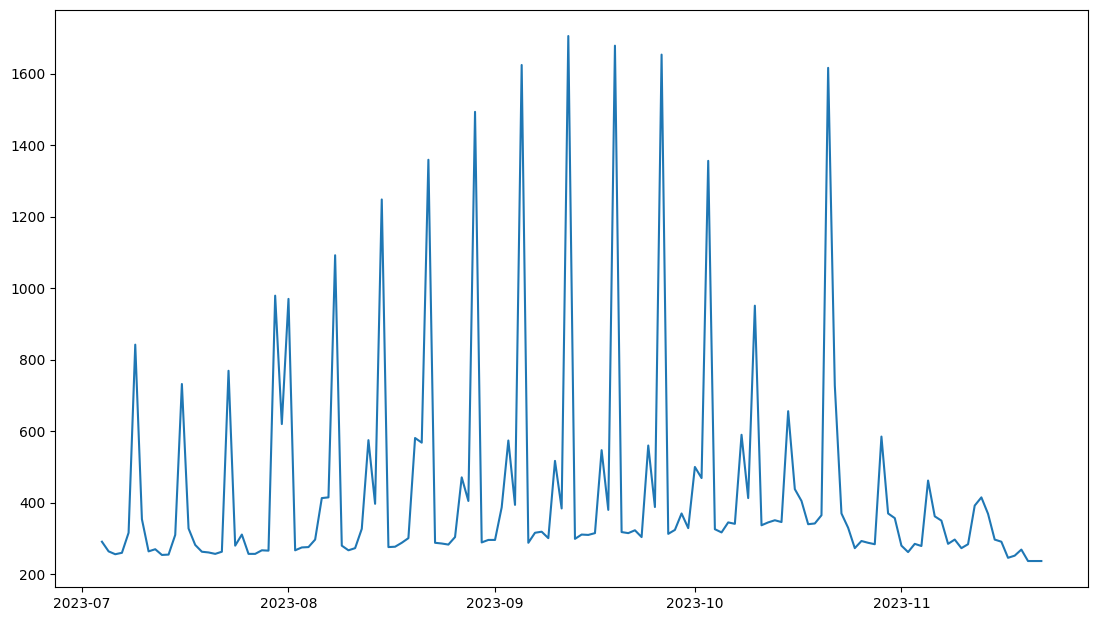

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast, label="prediction")
ax.set_title("Prediction AutoMl")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of results

In [ ]:
from metrics import print_evaluation_metrics
print_evaluation_metrics(prediction.forecast, test[target_column])

Evaluation Metrics:
MSE: 302023.17
RMSE: 549.57
MAE: 308.43
MAPE: nan
SMAPE: nan
